# Predicting the Revenue of Movie

ast.literal_eval

data[dict_column] = df[dict_column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x)

* Which genres makes more money??
* How the budget is related with revenue??

## Import the libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn import preprocessing
import ast
from sklearn.tree import DecisionTreeClassifier
from pandas.io.json import json_normalize

## Read the Data

In [32]:
##Reading the test data and the tarin data
my_train = pd.read_csv("tmdb-box-office-prediction/train.csv") ##train
my_test =  pd.read_csv("tmdb-box-office-prediction/test.csv") ##test
resposta = my_test[['id']]

#### Conferindo os dados

In [33]:
my_train.shape

(3000, 23)

In [34]:
##Verificando quantos valores nulos possui o Dataframe
my_train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [35]:
##Verificando as 5 primeiras colunas do Daatframe
pd.set_option('display.max_columns', 150)
my_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Colunas a serem trabalhas (Ideias):
 * **belongs_to_collection** : Verificar se faz parte de uma franquia ou não. **Done**
 * **budget** : Eliminar NaN. **Done**
 * **genres** : Fazer uma coluna para cada genêro de filme. **Done**
 * **popularity**: Eliminar NaN. **Done**
 * **production_companies**: Fazer uma coluna para as companhias mais frequentes. **DONE**
 * **production_countries**: Fazer uma coluna para cada pais. **Done**
 * **release_date** : Duas ideias. Verificar se estreia perto de um feriado, ou se estreiou junto com outro filme blockbuster. **Done**
 * **runtime** : Eliminar NaN. **Done**
 * **spoken_languages** : Fazer uma coluna para as linguas mais frequentes. **DONE**
 * **cast** : Fazer uma coluna para os atores mais frequentes.
 * **crew** : Fazer uma coluna para os diretores mais frequentes.
 * **homepage**: Verificar se possui ou não homepage
 ## Colunas a serem criadas (Ideias):
* **Blockbuster**: Verificar se o filme é um blockbuster ou não olhando para orçamento.
* **Marketing** : Verificar quanto o filme gastou com marketin (Teria que pesquisar).

## Colunas a serem excluidas:
* **imdb_id**: A não ser que use para pesquisar outros dados.
* **original_language**: redundancia com spoken_languages
* **original_title**
* **overview**
* **poster_path**
* **status** 
* **tagline**
* **title**
* **Keywords** 

## Resolvendo belongs_to_collection

In [36]:
def find_franchise(data):
    data['belongs_to_collection'].replace(to_replace=r'^', value = 1, regex=True,inplace = True)
    data['belongs_to_collection'].fillna(value=0.0,inplace = True)

## Resolvendo Genres

In [37]:
def find_genres(data):
    genres = []
    for index, d in data.iterrows():
            j = d['genres']
            try:
                json_acceptable = j.replace("'", "\"")
                lists = json.loads(json_acceptable)
                for  i in lists:
                    data.loc[index,i['name']] = 1
                    if i['name'] not in genres:
                        genres.append(i['name'])
            except:
                print(j)
    data.loc[:,genres] = data.loc[:,genres].fillna(value=0.0)

## Solving Runtime

In [38]:
def runtime_solve(data):
    data['runtime'].replace(to_replace= 0, value = data['runtime'].mean(),inplace = True )
    data['runtime'].fillna(value=data['runtime'].mean(),inplace = True)

## Solving Popularity

In [39]:
def popularity_solve(data):
    data['popularity'].fillna(value=data['popularity'].mean(),inplace = True)

## Solving Production Companies

In [40]:
def find_companies2(data):
    companies = []
    data['production_companies'] = data['production_companies'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    for index, d in data.iterrows():
            if(int(index) % 100 == 0):
                print(index)
            j = d['production_companies']
            data.loc[index,'num_companies'] = len(j)
            for i in j:
                data.loc[index,i['name']] = 1
                if i['name'] not in companies:
                    companies.append(i['name'])
    data.loc[:,companies] = data.loc[:,companies].fillna(value=0.0)
    for company in companies:
        if(data.loc[:,company].sum() < 30):
            data.drop([company],axis=1,inplace =True)

## Solving production Countries

In [41]:
def find_countries(data):
    countries = []
    for index, d in data.iterrows():
            j = d['production_countries']
            if type(j) is str:
                try:
                    json_acceptable = j.replace("'", "\"")
                    lists = json.loads(json_acceptable)
                    for i in lists:
                        data.loc[index,i['iso_3166_1']] = 1
                        if i['iso_3166_1'] not in countries:
                            countries.append(i['iso_3166_1'])
                except:
                    print(d['id'])
    data.loc[:,countries] = data.loc[:,countries].fillna(value=0.0)
    for country in countries:
        if(data.loc[:,country].sum() < 30):
            data.drop([country],axis=1,inplace =True)

## Solving spoken_languages

In [42]:
def find_languages(data):
    countries = []
    for index, d in data.iterrows():
            j = d['spoken_languages']
            if type(j) is str:
                try:
                    json_acceptable = j.replace("'", "\"")
                    lists = json.loads(json_acceptable)
                    data.loc[index,'num_languages']= len(lists)
                    for i in lists:
                        data.loc[index,i['iso_639_1']] = 1
                        if i['iso_639_1'] not in countries:
                            countries.append(i['iso_639_1'])
                except:
                    print(d['id'])
    data.loc[:,countries] = data.loc[:,countries].fillna(value=0.0)
    for country in countries:
        if(data.loc[:,country].sum() < 30):
            data.drop([country],axis=1,inplace =True)
    data['num_languages'].fillna(0,inplace=True)
    #print(len(countries))
    #print(countries)

## Solving Homepage

In [43]:
def homepage(data):
    data['homepage'] = data['homepage'].apply(lambda x : 0 if pd.isna(x) else 1 )

## Solving Date

In [44]:
def get_date(data):
    data['release_day'] = pd.to_datetime(data['release_date']).apply(lambda x: x.day)
    data['release_month'] = pd.to_datetime(data['release_date']).apply(lambda x: x.month)
    data['release_year'] = pd.to_datetime(data['release_date']).apply(lambda x: x.year if(x.year < 2019) else x.year-100)
    data['is_weekend'] = pd.to_datetime(data['release_date']).apply(lambda x: 1 if (x.dayofweek) > 3 else 0)

## Solving Crew

In [45]:
def find_crew(data):
    data['crew'] = data['crew'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    for index, d in data.iterrows():
            data.loc[index,'crew number'] = len(d['crew'])

## Solving Cast

In [46]:
def find_cast(data):
    data['cast'] = data['cast'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    for index, d in data.iterrows():
            data.loc[index,'cast number'] = len(d['cast'])

## Excluindo Colunas

In [47]:
def drop_columns(data):
    try:
        data.drop(['imdb_id','original_language','original_title','overview','genres',
                  'poster_path','status','tagline','title','Keywords','production_companies',
                   'production_countries','spoken_languages','cast','crew'],axis=1,inplace = True)
    except:
        print('***Columns already dropped***')
#my_train.isnull().sum()

## Creating Blockbuster

In [48]:
def is_blockbuster(data):
    for index, d in data.iterrows():
            if(d['budget']>= 150000000):
                data.loc[index,'Blockbuster'] = 1
            else:
                data.loc[index,'Blockbuster'] = 0

### Budget / Popularity Ratio

In [49]:
def budget_popularity_ratio(data):
    for index, d in data.iterrows():
        data.loc[index,'Budget__popularity_Ratio'] = d['budget']/d['popularity']

### Budget / Runtime Ratio

In [50]:
def budget_runtime_ratio(data):
    for index, d in data.iterrows():
        data.loc[index,'Budget_runtime_Ratio'] = d['budget']/d['runtime']

# Pipeline

In [51]:
def pipeline(data):
    find_franchise(data)
    print('Franchise Solved')
    find_genres(data)
    print('Genres Solved')
    runtime_solve(data)
    print('Runtime Solved')
    popularity_solve(data)
    print('Popularity Done')
    find_companies2(data)
    print('Companies Done')
    find_countries(data)
    print('Countries Done')
    find_languages(data)
    print('Languages Done')
    homepage(data)
    print('Homepage Done')
    get_date(data)
    print('Date Done')
    find_crew(data)
    print('Crew Done')
    find_cast(data)
    print('Cast Done')
    drop_columns(data)
    print('Drop Columns Done')
    is_blockbuster(data)
    print('Blockbuster Created')
    budget_popularity_ratio(data)
    print('Budget_popularity_Ratio Done')
    budget_runtime_ratio(data)
    print('Budget_runtime_Ratio Done')

In [52]:
pipeline(my_train)

Franchise Solved
nan
nan
nan
nan
nan
nan
nan
Genres Solved
Runtime Solved
Popularity Done
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
Companies Done
Countries Done
Languages Done
Homepage Done
Date Done
Crew Done
Cast Done
Drop Columns Done
Blockbuster Created
Budget_popularity_Ratio Done
Budget_runtime_Ratio Done


In [53]:
my_train.to_csv('process_train.csv',index=False)

In [54]:
pipeline(my_test)
my_test.to_csv('process_test.csv',index=False)

Franchise Solved
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Genres Solved
Runtime Solved
Popularity Done
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
Companies Done
4285
Countries Done
Languages Done
Homepage Done
Date Done
Crew Done
Cast Done
Drop Columns Done
Blockbuster Created
Budget_popularity_Ratio Done
Budget_runtime_Ratio Done


In [55]:
my_train.to_csv('process_train.csv',index= False)
my_test.to_csv('process_test.csv',index= False)

In [56]:
my_train=pd.read_csv('tmdb-box-office-prediction/process_train.csv')
my_test=pd.read_csv('tmdb-box-office-prediction/process_test.csv')

# Visualising

 ### Which genres makes more money ?

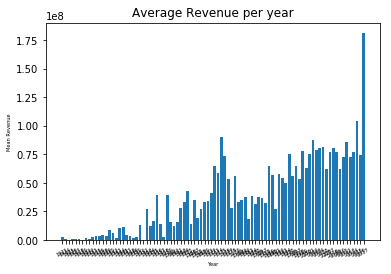

In [8]:
%matplotlib inline
np.sort(my_train['release_year'].unique())
means = []
num = []
for year in np.sort(my_train['release_year'].unique()):
    means.append(my_train.loc[my_train['release_year']==year,'revenue'].mean())
    #num.append(my_train.loc[my_train[genre]==1,'revenue'].shape[0])
#my_train.loc[my_train['Comedy']==1,'revenue'].mean()
index = np.arange(len(my_train['release_year'].unique()))
ax =plt.bar(index, means)
plt.xlabel('Year', fontsize=5)
plt.ylabel('Mean Revenue', fontsize=5)
plt.xticks(index, np.sort(my_train['release_year'].unique()), fontsize=5, rotation=30)
plt.title('Average Revenue per year')
j=0
#for i in ax.patches:
#    plt.annotate(num[j],(i.get_x()+0.2,i.get_height()),fontsize=8,color='red')
#    j+=1
plt.show()

In [87]:
%matplotlib
means = []
num = []
for genre in my_train.columns[9:29]:
    means.append(my_train.loc[my_train[genre]==1,'revenue'].mean())
    num.append(my_train.loc[my_train[genre]==1,'revenue'].shape[0])
#my_train.loc[my_train['Comedy']==1,'revenue'].mean()
index = np.arange(len(my_train.columns[9:29]))
ax =plt.bar(index, means)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('Mean Revenue', fontsize=5)
plt.xticks(index, my_train.columns[9:29], fontsize=5, rotation=30)
plt.title('Average Revenue per genre')
j=0
for i in ax.patches:
    plt.annotate(num[j],(i.get_x()+0.2,i.get_height()),fontsize=8,color='red')
    j+=1
plt.show()

Using matplotlib backend: Qt5Agg


 ### Which Company makes more money ?

In [35]:
%matplotlib
means = []
num = []
for genre in my_train.columns[29:49]:
    means.append(my_train.loc[my_train[genre]==1,'revenue'].mean())
    num.append(my_train.loc[my_train[genre]==1,'revenue'].shape[0])
#my_train.loc[my_train['Comedy']==1,'revenue'].mean()
index = np.arange(len(my_train.columns[29:49]))
ax =plt.bar(index, means)
plt.xlabel('Company', fontsize=5)
plt.ylabel('Mean Revenue', fontsize=5)
plt.xticks(index, my_train.columns[29:49], fontsize=5, rotation=30)
plt.title('Average Revenue per Company')
j=0
for i in ax.patches:
    plt.annotate(num[j],(i.get_x()+0.2,i.get_height()),fontsize=8,color='red')
    j+=1
plt.show()

Using matplotlib backend: Qt5Agg


### Which Country makes more money ?

In [82]:
%matplotlib
means = []
num = []
for genre in my_train.columns[48:61]:
    means.append(my_train.loc[my_train[genre]==1,'revenue'].mean())
    num.append(my_train.loc[my_train[genre]==1,'revenue'].shape[0])
#my_train.loc[my_train['Comedy']==1,'revenue'].mean()
index = np.arange(len(my_train.columns[48:61]))
ax =plt.bar(index, means)
plt.xlabel('Country', fontsize=5)
plt.ylabel('Mean Revenue', fontsize=5)
plt.xticks(index, my_train.columns[48:61], fontsize=5, rotation=30)
plt.title('Average Revenue per Country')
j=0
for i in ax.patches:
    plt.annotate(num[j],(i.get_x()+0.2,i.get_height()),fontsize=8,color='red')
    j+=1
plt.show()

Using matplotlib backend: Qt5Agg


### Which Language makes more money ?

In [36]:
%matplotlib
means = []
num = []
for genre in my_train.columns[61:]:
    means.append(my_train.loc[my_train[genre]==1,'revenue'].mean())
    num.append(my_train.loc[my_train[genre]==1,'revenue'].shape[0])
#my_train.loc[my_train['Comedy']==1,'revenue'].mean()
index = np.arange(len(my_train.columns[61:]))
ax =plt.bar(index, means)
plt.xlabel('Language', fontsize=5)
plt.ylabel('Mean Revenue', fontsize=5)
plt.xticks(index, my_train.columns[61:], fontsize=5, rotation=30)
plt.title('Average Revenue per Language')
j=0
for i in ax.patches:
    plt.annotate(num[j],(i.get_x()+0.2,i.get_height()),fontsize=8,color='red')
    j+=1
plt.show()

Using matplotlib backend: Qt5Agg


### How the budget is related to the revenue?

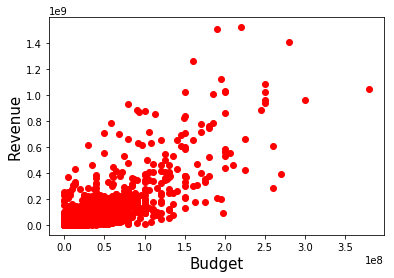

In [9]:
%matplotlib inline
#plt.scatter(my_train['budget'],my_train['revenue'])
plt.scatter(my_train.loc[my_train['release_year']>1999,'budget'],my_train.loc[my_train['release_year']>1999,'revenue'],color='red')
#plt.scatter(my_train.loc[my_train['release_year']<2000,'budget'],my_train.loc[my_train['release_year']<2000,'revenue'],color='blue',alpha=0.5)
plt.xlabel('Budget', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

### How the popularity is related to the revenue?

In [98]:
%matplotlib
plt.scatter(my_train.loc[my_train['Adventure'] == 1,['popularity']],my_train.loc[my_train['Adventure'] == 1,['revenue']],color='red')
plt.scatter(my_train.loc[my_train['Adventure'] == 0,['popularity']],my_train.loc[my_train['Adventure'] == 0,['revenue']],color='blue')
#plt.scatter(my_train.loc[my_train['Adventure']==1,'budget'],my_train.loc[my_train['Adventure']==1,'revenue'])
plt.xlabel('Popularity', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

Using matplotlib backend: Qt5Agg


In [108]:
%matplotlib
plt.scatter(my_train.loc[my_train['belongs_to_collection'] == 1,['popularity']],my_train.loc[my_train['belongs_to_collection'] == 1,['revenue']],color='red')
plt.scatter(my_train.loc[my_train['belongs_to_collection'] == 0,['popularity']],my_train.loc[my_train['belongs_to_collection'] == 0,['revenue']],color='blue')
#plt.scatter(my_train.loc[my_train['Adventure']==1,'budget'],my_train.loc[my_train['Adventure']==1,'revenue'])
plt.xlabel('Popularity', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

Using matplotlib backend: Qt5Agg


### How the runtime is related to the revenue?

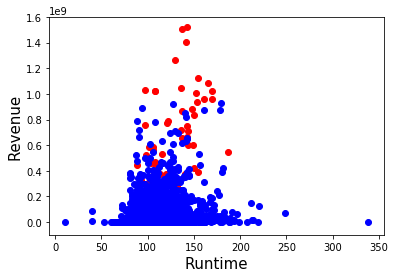

In [10]:

plt.scatter(my_train.loc[my_train['Blockbuster'] == 1,['runtime']],my_train.loc[my_train['Blockbuster'] == 1,['revenue']],color='red')
plt.scatter(my_train.loc[my_train['Blockbuster'] == 0,['runtime']],my_train.loc[my_train['Blockbuster'] == 0,['revenue']],color='blue')
#plt.scatter(my_train.loc[my_train['Adventure']==1,'budget'],my_train.loc[my_train['Adventure']==1,'revenue'])
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

No handles with labels found to put in legend.


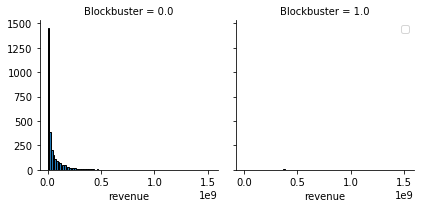

In [11]:

import seaborn as sns
bins = np.linspace(my_train.revenue.min(), my_train.revenue.max(), 100)
g = sns.FacetGrid(my_train, col='Blockbuster',palette="Set1", col_wrap = 2)
g.map(plt.hist, 'revenue', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [121]:
my_train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,...,Miramax Films,Village Roadshow Pictures,Dune Entertainment,Relativity Media,Working Title Films,US,IN,CA,GB,DE,FR,JP,IT,CN,HK,RU,ES,AU,en,hi,ko,ar,ru,de,fr,it,ja,pt,zh,es,cn,release_day,release_month,release_year,is_weekend,Blockbuster,Budget_Ratio
0,1,1.0,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,2,2015,1,0.0,2.129150e+06


## Test Data

In [105]:
print(my_test.shape)
my_test.isnull().sum()

(4398, 22)


id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                0
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [109]:
pipeline(my_test)

Franchise Solved
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Genres Solved
Runtime Solved
Popularity Done
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
Companies Done
4285
Countries Done
Languages Done
Homepage Done
Date Done
Crew Done
Cast Done
Drop Columns Done
Blockbuster Created
Budget_Ratio Done


In [88]:
df=my_test.align(my_train,join='right',axis = 1)
test =df[0]

In [89]:
test.head()

,id,belongs_to_collection,budget,homepage,popularity,release_date,runtime,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie,num_companies,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM),Walt Disney Pictures,Twentieth Century Fox Film Corporation,BBC Films,Canal+,New Line Cinema,Universal Pictures,Warner Bros.,Columbia Pictures Corporation,TriStar Pictures,Columbia Pictures,Touchstone Pictures,Regency Enterprises,Miramax Films,Village Roadshow Pictures,Dune Entertainment,Relativity Media,Working Title Films,US,IN,CA,GB,DE,FR,JP,IT,CN,HK,RU,ES,AU,num_languages,en,hi,ko,ar,ru,de,fr,it,ja,pt,zh,es,cn,release_day,release_month,release_year,is_weekend,crew number,cast number,Blockbuster,Budget__popularity_Ratio,Budget_runtime_Ratio
0,3001,1.0,0,1,3.851534,7/14/07,90.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14,7,2007,1,2.0,7.0,0.0,0.000000,0.000000
1,3002,0.0,88000,0,3.559789,5/19/58,65.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,5,1958,1,8.0,10.0,0.0,24720.566303,1353.846154
2,3003,0.0,0,0,8.085194,5/23/97,100.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,5,1997,1,10.0,9.0,0.0,0.000000,0.000000
3,3004,0.0,6800000,1,8.596012,9/4/10,130.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,2010,1,69.0,23.0,0.0,791064.507588,52307.692308
4,3005,0.0,2000000,0,3.217680,2/11/05,92.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2005,1,14.0,4.0,0.0,621565.848686,21739.130435


# Training the models (first try)

In [90]:
#Excluindo colunas
try:
        test.drop(['TV Movie','id',
                  'release_date','BBC Films','revenue'],axis=1,inplace = True)
        my_train.drop(['TV Movie','id',
                  'release_date','BBC Films'],axis=1,inplace = True)
except:
        print('***Columns already dropped***')

In [230]:
print(my_train.columns[57:70])
print(test.columns[56:69])
print(my_train.columns[25:44])
print(test.columns[24:43])
p = list(my_train.columns[57:70])
q = list(my_train.columns[25:44])

Index(['en', 'hi', 'ko', 'ar', 'ru', 'de', 'fr', 'it', 'ja', 'pt', 'zh', 'es',
       'cn'],
      dtype='object')
Index(['en', 'hi', 'ko', 'ar', 'ru', 'de', 'fr', 'it', 'ja', 'pt', 'zh', 'es',
       'cn'],
      dtype='object')
Index(['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures', 'Twentieth Century Fox Film Corporation',
       'Canal+', 'New Line Cinema', 'Universal Pictures', 'Warner Bros.',
       'Columbia Pictures Corporation', 'TriStar Pictures',
       'Columbia Pictures', 'Touchstone Pictures', 'Regency Enterprises',
       'Miramax Films', 'Village Roadshow Pictures', 'Dune Entertainment',
       'Relativity Media', 'Working Title Films'],
      dtype='object')
Index(['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures', 'Twentieth Century Fox Film Corporation',
       'Canal+', 'New Line Cinema', 'Universal Pictures', 'Warner Bros.',
       'Columbia Pictures Corporation', 'T

In [232]:
my_train['Num Companies'] = my_train.loc[:,my_train.columns[25:44]].sum(axis=1)
test['Num Companies'] = test.loc[:,test.columns[24:43]].sum(axis=1)
my_train['Num Languages'] = my_train.loc[:,my_train.columns[57:70]].sum(axis=1)
test['Num Languages'] = test.loc[:,test.columns[56:69]].sum(axis=1)

In [234]:
#try:
#test.drop(p,axis=1,inplace = True)
#test.drop([list(test.columns[56:69])],axis=1,inplace = True)
my_train.drop(p,axis=1,inplace = True)
my_train.drop(q,axis=1,inplace = True)
test.drop(p,axis=1,inplace = True)
test.drop(q,axis=1,inplace = True)
#my_train.drop(list([my_train.columns[57:70]]),axis=1,inplace = True)
#except:
 #       print('***Columns already dropped***')

In [237]:
my_train.head(2)

,belongs_to_collection,budget,homepage,popularity,runtime,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,US,IN,CA,GB,DE,FR,JP,IT,CN,HK,RU,ES,AU,release_day,release_month,release_year,is_weekend,crew number,cast number,Blockbuster,Budget_Ratio,Num Companies,Num Languages
0,1.0,14000000,0,6.575393,93.0,12314651,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,2,2015,1,72.0,24.0,0.0,2.129150e+06,3.0,1.0
1,1.0,40000000,0,8.248895,113.0,95149435,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,8,2004,1,9.0,20.0,0.0,4.849134e+06,1.0,1.0


In [298]:
d = list(my_train.columns[26:38])
my_train.drop(d,axis=1,inplace = True)
test.drop(d,axis=1,inplace = True)

In [310]:
my_train['new_movie'] = my_train['release_year'].apply(lambda x: 1 if(x > 1999) else 0)
test['new_movie'] = test['release_year'].apply(lambda x: 1 if(x> 1999) else 0)

In [314]:
my_train.corr(method='spearman')

,belongs_to_collection,budget,homepage,popularity,runtime,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,US,release_day,release_month,release_year,is_weekend,crew number,cast number,Blockbuster,Budget_Ratio,Num Companies,Num Languages,new_movie
belongs_to_collection,1.000000,0.163471,0.060001,0.224565,-0.039803,0.313753,-0.015712,-0.293068,0.128978,-0.154497,0.062587,0.184677,0.112381,0.217822,0.183711,-0.047139,-0.028403,0.015049,0.136751,0.002209,-0.051304,0.094263,-0.014510,-0.046559,-0.083396,0.082911,0.003402,-0.051183,-0.081546,-0.057600,0.097247,0.112309,0.184157,0.098637,0.132082,0.039930,-0.060517
budget,0.163471,1.000000,0.215307,0.509599,0.261590,0.691231,-0.032811,-0.114056,0.127220,-0.056301,0.122730,0.240871,0.079450,0.241505,-0.021277,-0.184965,-0.030651,0.073774,0.149767,0.036669,-0.097539,0.142243,0.045048,-0.019999,0.032458,0.325561,0.018511,0.052276,0.154163,-0.094624,0.431515,0.376394,0.248907,0.916786,0.404447,0.147440,0.178941
homepage,0.060001,0.215307,1.000000,0.219254,0.049129,0.192011,-0.035012,-0.036990,0.030632,-0.064062,-0.004559,0.040485,0.093345,0.076254,-0.014124,0.075096,-0.034103,-0.035342,0.049897,-0.021653,-0.019688,0.021063,-0.006128,-0.039589,-0.002183,0.039359,0.002507,-0.015676,0.438568,-0.099733,0.170650,0.137861,0.163629,0.143930,-0.047323,0.040472,0.413632
popularity,0.224565,0.509599,0.219254,1.000000,0.183636,0.596192,-0.072800,-0.089488,0.067967,-0.102369,0.143882,0.128890,0.086568,0.185506,0.072788,-0.177152,-0.057137,0.069292,0.104050,0.077261,-0.153741,0.116107,0.022705,0.004160,0.003684,0.313482,0.039575,0.024274,0.130447,-0.115856,0.491792,0.439109,0.180005,0.230213,0.313645,0.162012,0.089767
runtime,-0.039803,0.261590,0.049129,0.183636,1.000000,0.261098,-0.233899,0.292277,-0.180776,0.069671,0.030228,0.113670,-0.225772,0.069703,-0.184064,-0.103242,0.008528,0.050311,-0.038168,0.023969,-0.021357,-0.009973,0.119529,0.048416,0.191905,-0.059367,0.050003,0.138798,0.012724,-0.072806,0.175611,0.252403,0.125827,0.227645,0.134383,0.126818,0.008544
revenue,0.313753,0.691231,0.192011,0.596192,0.261098,1.000000,0.035653,-0.168335,0.168371,-0.032208,0.072318,0.197882,0.092614,0.251697,0.003081,-0.190147,-0.024272,0.052699,0.103181,0.034819,-0.126544,0.145117,0.003007,-0.022009,-0.002476,0.331030,0.061911,0.034994,0.017604,-0.097777,0.432504,0.410422,0.235765,0.542545,0.484072,0.133741,0.039419
Comedy,-0.015712,-0.032811,-0.035012,-0.072800,-0.233899,0.035653,1.000000,-0.239723,0.114600,0.192039,-0.327614,-0.141548,0.015544,-0.056496,-0.131244,-0.099664,0.010695,-0.086467,-0.114972,-0.138927,0.016511,0.001318,-0.102773,-0.069340,-0.127500,0.039563,-0.031159,-0.064376,-0.028294,0.043134,-0.146224,0.027195,-0.065390,-0.003344,0.050594,-0.055870,-0.022364
Drama,-0.293068,-0.114056,-0.036990,-0.089488,0.292277,-0.168335,-0.239723,1.000000,-0.155682,0.152194,-0.029766,-0.187329,-0.144796,-0.196278,-0.214418,-0.152585,0.014735,0.052610,-0.189540,0.023228,-0.005409,-0.120814,0.074170,-0.005298,0.164629,-0.091550,0.011549,0.110019,0.004485,0.020519,-0.020519,-0.005390,-0.101431,-0.089297,-0.092013,0.010245,0.010936
Family,0.128978,0.127220,0.030632,0.067967,-0.180776,0.168371,0.114600,-0.155682,1.000000,-0.049758,-0.170561,-0.104998,0.474609,0.257958,-0.098928,-0.024994,0.048402,-0.129340,0.039559,-0.074220,-0.019761,0.256780,-0.057202,-0.037147,-0.066086,0.078379,-0.005180,-0.006706,0.000812,-0.006432,0.001769,-0.009941,0.113482,0.118958,0.084816,-0.047737,-0.008434
Romance,-0.154497,-0.056301,-0.064062,-0.102369,0.069671,-0.032208,0.192039,0.152194,-0.049758,1.000000,-0.193200,-0.175304,-0.079588,-0.099837,-0.130826,-0.078730,0.094449,-0.124540,-0.098263,-0.083254,0.017630,-0.019573,-0.023809,-0.022748,-0.033634,-0.026549,-0.000744,0.022968,-0.079195,0.017341,-0.092128,-0.045490,-0.058496,-0.022919,0.006382,-0.021163,-0.049193


# XGBoost

In [92]:
my_train.head(1)

,belongs_to_collection,budget,homepage,popularity,runtime,revenue,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,num_companies,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM),Walt Disney Pictures,Twentieth Century Fox Film Corporation,Canal+,New Line Cinema,Universal Pictures,Warner Bros.,Columbia Pictures Corporation,TriStar Pictures,Columbia Pictures,Touchstone Pictures,Regency Enterprises,Miramax Films,Village Roadshow Pictures,Dune Entertainment,Relativity Media,Working Title Films,US,IN,CA,GB,DE,FR,JP,IT,CN,HK,RU,ES,AU,num_languages,en,hi,ko,ar,ru,de,fr,it,ja,pt,zh,es,cn,release_day,release_month,release_year,is_weekend,crew number,cast number,Blockbuster,Budget__popularity_Ratio,Budget_runtime_Ratio
0,1.0,14000000,0,6.575393,93.0,12314651,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,2,2015,1,72.0,24.0,0.0,2.129150e+06,150537.634409


In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from xgboost import cv
from xgboost import DMatrix

In [316]:
X = my_train.drop(['revenue'],axis=1).values
Y = my_train[['revenue']].values
Test = test.values
Test = preprocessing.StandardScaler().fit(Test).transform(Test)
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size = 0.2,random_state = 10)
my_model = XGBRegressor(max_depth=15, 
                            learning_rate=0.01, 
                            n_estimators=1000, 
                            objective='reg:linear',
                            gamma=1.45, 
                            seed=10, 
                            silent=True,
                            subsample=0.7, 
                            colsample_bytree=0.8, 
                            colsample_bylevel=0.50)
my_model.fit(X_train, y_train , early_stopping_rounds=60, eval_set=[(X_valid, y_valid)])
predictions = my_model.predict(X_valid)
print("Mean Squared Error: " + str(sqrt(mean_squared_error(predictions, y_valid))))
for i in range(len(predictions)):
    if(predictions[i] < 0):
        predictions[i] = 0.0
print("Root-Mean-Squared-Logarithmic-Error (RMSLE)"+str(sqrt(mean_squared_log_error(y_valid,predictions))))
print("R2-score: %.2f" % r2_score(y_valid,predictions) )


[0]	validation_0-rmse:1.42404e+08
Will train until validation_0-rmse hasn't improved in 60 rounds.
[1]	validation_0-rmse:1.41257e+08
[2]	validation_0-rmse:1.40121e+08
[3]	validation_0-rmse:1.39007e+08
[4]	validation_0-rmse:1.37948e+08
[5]	validation_0-rmse:1.36934e+08
[6]	validation_0-rmse:1.36146e+08
[7]	validation_0-rmse:1.35299e+08
[8]	validation_0-rmse:1.34377e+08
[9]	validation_0-rmse:1.33519e+08
[10]	validation_0-rmse:1.32533e+08
[11]	validation_0-rmse:1.31534e+08
[12]	validation_0-rmse:1.30711e+08
[13]	validation_0-rmse:1.29863e+08
[14]	validation_0-rmse:1.28997e+08
[15]	validation_0-rmse:1.28105e+08
[16]	validation_0-rmse:1.27202e+08
[17]	validation_0-rmse:1.26211e+08
[18]	validation_0-rmse:1.25488e+08
[19]	validation_0-rmse:1.24858e+08
[20]	validation_0-rmse:1.24007e+08
[21]	validation_0-rmse:1.23179e+08
[22]	validation_0-rmse:1.22331e+08
[23]	validation_0-rmse:1.21571e+08
[24]	validation_0-rmse:1.2073e+08
[25]	validation_0-rmse:1.20055e+08
[26]	validation_0-rmse:1.19141e+08
[

[230]	validation_0-rmse:6.63143e+07
[231]	validation_0-rmse:6.63069e+07
[232]	validation_0-rmse:6.62596e+07
[233]	validation_0-rmse:6.6211e+07
[234]	validation_0-rmse:6.6148e+07
[235]	validation_0-rmse:6.60885e+07
[236]	validation_0-rmse:6.60563e+07
[237]	validation_0-rmse:6.60142e+07
[238]	validation_0-rmse:6.59734e+07
[239]	validation_0-rmse:6.59029e+07
[240]	validation_0-rmse:6.58703e+07
[241]	validation_0-rmse:6.57828e+07
[242]	validation_0-rmse:6.57533e+07
[243]	validation_0-rmse:6.57307e+07
[244]	validation_0-rmse:6.5647e+07
[245]	validation_0-rmse:6.56172e+07
[246]	validation_0-rmse:6.55941e+07
[247]	validation_0-rmse:6.55491e+07
[248]	validation_0-rmse:6.55145e+07
[249]	validation_0-rmse:6.54661e+07
[250]	validation_0-rmse:6.54112e+07
[251]	validation_0-rmse:6.53755e+07
[252]	validation_0-rmse:6.53472e+07
[253]	validation_0-rmse:6.53094e+07
[254]	validation_0-rmse:6.52976e+07
[255]	validation_0-rmse:6.52495e+07
[256]	validation_0-rmse:6.52638e+07
[257]	validation_0-rmse:6.52293

In [ ]:
xgtrain = xgb.DMatrix(X_sel, label=y)

In [259]:
predictions = my_model.predict(Test)
resposta['revenue'] = predictions
resposta.head()

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,revenue
0,3001,28218690.0
1,3002,7676037.0
2,3003,34275988.0
3,3004,31793624.0
4,3005,3630216.0


In [260]:
resposta.to_csv('Second_try.csv',index=False)

## Cross Validation

In [320]:
new_movie_set = my_train.loc[my_train['new_movie']==1,:]
old_movie_set = my_train.loc[my_train['new_movie']==0,:]

In [326]:
test.head()

,belongs_to_collection,budget,homepage,popularity,runtime,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,US,release_day,release_month,release_year,is_weekend,crew number,cast number,Blockbuster,Budget_Ratio,Num Companies,Num Languages,new_movie
0,1.0,0,1,3.851534,90.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14,7,2007,1,2.0,7.0,0.0,0.000000,0.0,2.0,1
1,0.0,88000,0,3.559789,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19,5,1958,1,8.0,10.0,0.0,24720.566303,0.0,1.0,0
2,0.0,0,0,8.085194,100.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23,5,1997,1,10.0,9.0,0.0,0.000000,1.0,1.0,0
3,0.0,6800000,1,8.596012,130.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4,9,2010,1,69.0,23.0,0.0,791064.507588,0.0,3.0,1
4,0.0,2000000,0,3.217680,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11,2,2005,1,14.0,4.0,0.0,621565.848686,0.0,1.0,1


In [327]:
from sklearn.model_selection import KFold
X = old_movie_set.drop(['revenue'],axis=1).values
Y = old_movie_set[['revenue']].values
X = preprocessing.StandardScaler().fit(X).transform(X)
K = KFold(n_splits = 5, random_state = 3228, shuffle = True)
preds = []
scores = []
models = []
for train_index, valid_index in K.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = Y[train_index], Y[valid_index]
    clf = XGBRegressor(max_depth=15, 
                            learning_rate=0.01, 
                            n_estimators=1000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=10, 
                            silent=True,
                            subsample=0.7, 
                            colsample_bytree=0.8, 
                            colsample_bylevel=0.50)
    clf.fit(X_train, y_train , early_stopping_rounds=60, eval_set=[(X_valid, y_valid)])
    predictions = clf.predict(X_valid)
    for i in range(len(predictions)):
        if(predictions[i] < 0):
            predictions[i] = 0.0
    #print("Root-Mean-Squared-Logarithmic-Error (RMSLE)"+str(sqrt(mean_squared_log_error(y_valid,predictions))))
    models.append(clf)
    preds.append(predictions)
    scores.append(sqrt(mean_squared_log_error(y_valid,predictions)))
print(scores)

[0]	validation_0-rmse:8.31833e+07
Will train until validation_0-rmse hasn't improved in 60 rounds.
[1]	validation_0-rmse:8.28194e+07
[2]	validation_0-rmse:8.23168e+07
[3]	validation_0-rmse:8.18408e+07
[4]	validation_0-rmse:8.14031e+07
[5]	validation_0-rmse:8.09211e+07
[6]	validation_0-rmse:8.04005e+07
[7]	validation_0-rmse:7.99263e+07
[8]	validation_0-rmse:7.9404e+07
[9]	validation_0-rmse:7.89681e+07
[10]	validation_0-rmse:7.84852e+07
[11]	validation_0-rmse:7.80506e+07
[12]	validation_0-rmse:7.77451e+07
[13]	validation_0-rmse:7.72137e+07
[14]	validation_0-rmse:7.66363e+07
[15]	validation_0-rmse:7.61108e+07
[16]	validation_0-rmse:7.56025e+07
[17]	validation_0-rmse:7.50845e+07
[18]	validation_0-rmse:7.47702e+07
[19]	validation_0-rmse:7.44048e+07
[20]	validation_0-rmse:7.39841e+07
[21]	validation_0-rmse:7.3583e+07
[22]	validation_0-rmse:7.31413e+07
[23]	validation_0-rmse:7.28262e+07
[24]	validation_0-rmse:7.24064e+07
[25]	validation_0-rmse:7.20526e+07
[26]	validation_0-rmse:7.16925e+07
[2

[230]	validation_0-rmse:5.24803e+07
[231]	validation_0-rmse:5.24763e+07
[232]	validation_0-rmse:5.24806e+07
[233]	validation_0-rmse:5.24595e+07
[234]	validation_0-rmse:5.24577e+07
[235]	validation_0-rmse:5.24516e+07
[236]	validation_0-rmse:5.24319e+07
[237]	validation_0-rmse:5.24193e+07
[238]	validation_0-rmse:5.24436e+07
[239]	validation_0-rmse:5.24705e+07
[240]	validation_0-rmse:5.24843e+07
[241]	validation_0-rmse:5.24648e+07
[242]	validation_0-rmse:5.24601e+07
[243]	validation_0-rmse:5.24403e+07
[244]	validation_0-rmse:5.24509e+07
[245]	validation_0-rmse:5.24523e+07
[246]	validation_0-rmse:5.24381e+07
[247]	validation_0-rmse:5.24499e+07
[248]	validation_0-rmse:5.24454e+07
[249]	validation_0-rmse:5.24443e+07
[250]	validation_0-rmse:5.24456e+07
[251]	validation_0-rmse:5.24481e+07
[252]	validation_0-rmse:5.24685e+07
[253]	validation_0-rmse:5.24706e+07
[254]	validation_0-rmse:5.24873e+07
[255]	validation_0-rmse:5.24837e+07
[256]	validation_0-rmse:5.24936e+07
[257]	validation_0-rmse:5.25

[189]	validation_0-rmse:5.12211e+07
[190]	validation_0-rmse:5.12233e+07
[191]	validation_0-rmse:5.11999e+07
[192]	validation_0-rmse:5.12056e+07
[193]	validation_0-rmse:5.11977e+07
[194]	validation_0-rmse:5.119e+07
[195]	validation_0-rmse:5.1141e+07
[196]	validation_0-rmse:5.11447e+07
[197]	validation_0-rmse:5.11137e+07
[198]	validation_0-rmse:5.11146e+07
[199]	validation_0-rmse:5.10926e+07
[200]	validation_0-rmse:5.10894e+07
[201]	validation_0-rmse:5.10575e+07
[202]	validation_0-rmse:5.10208e+07
[203]	validation_0-rmse:5.10236e+07
[204]	validation_0-rmse:5.10201e+07
[205]	validation_0-rmse:5.10052e+07
[206]	validation_0-rmse:5.09337e+07
[207]	validation_0-rmse:5.094e+07
[208]	validation_0-rmse:5.09184e+07
[209]	validation_0-rmse:5.09356e+07
[210]	validation_0-rmse:5.08852e+07
[211]	validation_0-rmse:5.08415e+07
[212]	validation_0-rmse:5.08702e+07
[213]	validation_0-rmse:5.08641e+07
[214]	validation_0-rmse:5.08634e+07
[215]	validation_0-rmse:5.08493e+07
[216]	validation_0-rmse:5.0823e+0

[16]	validation_0-rmse:1.09332e+08
[17]	validation_0-rmse:1.08998e+08
[18]	validation_0-rmse:1.0874e+08
[19]	validation_0-rmse:1.08484e+08
[20]	validation_0-rmse:1.08176e+08
[21]	validation_0-rmse:1.07845e+08
[22]	validation_0-rmse:1.07551e+08
[23]	validation_0-rmse:1.07291e+08
[24]	validation_0-rmse:1.07027e+08
[25]	validation_0-rmse:1.06768e+08
[26]	validation_0-rmse:1.06515e+08
[27]	validation_0-rmse:1.06206e+08
[28]	validation_0-rmse:1.05919e+08
[29]	validation_0-rmse:1.05671e+08
[30]	validation_0-rmse:1.05437e+08
[31]	validation_0-rmse:1.05176e+08
[32]	validation_0-rmse:1.04938e+08
[33]	validation_0-rmse:1.04676e+08
[34]	validation_0-rmse:1.04414e+08
[35]	validation_0-rmse:1.04154e+08
[36]	validation_0-rmse:1.03887e+08
[37]	validation_0-rmse:1.03651e+08
[38]	validation_0-rmse:1.03447e+08
[39]	validation_0-rmse:1.03246e+08
[40]	validation_0-rmse:1.03042e+08
[41]	validation_0-rmse:1.02824e+08
[42]	validation_0-rmse:1.0264e+08
[43]	validation_0-rmse:1.02365e+08
[44]	validation_0-rmse

[247]	validation_0-rmse:8.32655e+07
[248]	validation_0-rmse:8.32507e+07
[249]	validation_0-rmse:8.32272e+07
[250]	validation_0-rmse:8.3209e+07
[251]	validation_0-rmse:8.32043e+07
[252]	validation_0-rmse:8.31799e+07
[253]	validation_0-rmse:8.31288e+07
[254]	validation_0-rmse:8.31198e+07
[255]	validation_0-rmse:8.31063e+07
[256]	validation_0-rmse:8.30764e+07
[257]	validation_0-rmse:8.3074e+07
[258]	validation_0-rmse:8.30482e+07
[259]	validation_0-rmse:8.30118e+07
[260]	validation_0-rmse:8.29841e+07
[261]	validation_0-rmse:8.29704e+07
[262]	validation_0-rmse:8.29438e+07
[263]	validation_0-rmse:8.29362e+07
[264]	validation_0-rmse:8.28971e+07
[265]	validation_0-rmse:8.286e+07
[266]	validation_0-rmse:8.28113e+07
[267]	validation_0-rmse:8.27815e+07
[268]	validation_0-rmse:8.27577e+07
[269]	validation_0-rmse:8.2746e+07
[270]	validation_0-rmse:8.27375e+07
[271]	validation_0-rmse:8.26908e+07
[272]	validation_0-rmse:8.26778e+07
[273]	validation_0-rmse:8.2645e+07
[274]	validation_0-rmse:8.26383e+0

[476]	validation_0-rmse:8.08077e+07
[477]	validation_0-rmse:8.0809e+07
[478]	validation_0-rmse:8.08072e+07
[479]	validation_0-rmse:8.0797e+07
[480]	validation_0-rmse:8.0801e+07
[481]	validation_0-rmse:8.07955e+07
[482]	validation_0-rmse:8.07929e+07
[483]	validation_0-rmse:8.07936e+07
[484]	validation_0-rmse:8.07921e+07
[485]	validation_0-rmse:8.07857e+07
[486]	validation_0-rmse:8.07867e+07
[487]	validation_0-rmse:8.07905e+07
[488]	validation_0-rmse:8.07908e+07
[489]	validation_0-rmse:8.07843e+07
[490]	validation_0-rmse:8.07821e+07
[491]	validation_0-rmse:8.07814e+07
[492]	validation_0-rmse:8.07727e+07
[493]	validation_0-rmse:8.07727e+07
[494]	validation_0-rmse:8.07532e+07
[495]	validation_0-rmse:8.0753e+07
[496]	validation_0-rmse:8.07462e+07
[497]	validation_0-rmse:8.07428e+07
[498]	validation_0-rmse:8.07407e+07
[499]	validation_0-rmse:8.07406e+07
[500]	validation_0-rmse:8.07351e+07
[501]	validation_0-rmse:8.07277e+07
[502]	validation_0-rmse:8.07336e+07
[503]	validation_0-rmse:8.07329e

[705]	validation_0-rmse:8.05554e+07
[706]	validation_0-rmse:8.05587e+07
[707]	validation_0-rmse:8.05602e+07
[708]	validation_0-rmse:8.056e+07
[709]	validation_0-rmse:8.05579e+07
[710]	validation_0-rmse:8.0558e+07
[711]	validation_0-rmse:8.05567e+07
[712]	validation_0-rmse:8.0558e+07
[713]	validation_0-rmse:8.05595e+07
[714]	validation_0-rmse:8.05574e+07
[715]	validation_0-rmse:8.05591e+07
[716]	validation_0-rmse:8.05577e+07
[717]	validation_0-rmse:8.0555e+07
[718]	validation_0-rmse:8.05505e+07
[719]	validation_0-rmse:8.05514e+07
[720]	validation_0-rmse:8.05513e+07
[721]	validation_0-rmse:8.05505e+07
[722]	validation_0-rmse:8.0548e+07
[723]	validation_0-rmse:8.05498e+07
[724]	validation_0-rmse:8.05476e+07
[725]	validation_0-rmse:8.05457e+07
[726]	validation_0-rmse:8.05467e+07
[727]	validation_0-rmse:8.05443e+07
[728]	validation_0-rmse:8.05457e+07
[729]	validation_0-rmse:8.05453e+07
[730]	validation_0-rmse:8.05466e+07
[731]	validation_0-rmse:8.05478e+07
[732]	validation_0-rmse:8.05477e+0

[38]	validation_0-rmse:7.51215e+07
[39]	validation_0-rmse:7.47683e+07
[40]	validation_0-rmse:7.44611e+07
[41]	validation_0-rmse:7.41881e+07
[42]	validation_0-rmse:7.38421e+07
[43]	validation_0-rmse:7.35571e+07
[44]	validation_0-rmse:7.33117e+07
[45]	validation_0-rmse:7.30881e+07
[46]	validation_0-rmse:7.28328e+07
[47]	validation_0-rmse:7.26157e+07
[48]	validation_0-rmse:7.23513e+07
[49]	validation_0-rmse:7.20748e+07
[50]	validation_0-rmse:7.17997e+07
[51]	validation_0-rmse:7.1566e+07
[52]	validation_0-rmse:7.1338e+07
[53]	validation_0-rmse:7.11169e+07
[54]	validation_0-rmse:7.08518e+07
[55]	validation_0-rmse:7.06343e+07
[56]	validation_0-rmse:7.05133e+07
[57]	validation_0-rmse:7.02882e+07
[58]	validation_0-rmse:7.01182e+07
[59]	validation_0-rmse:6.98304e+07
[60]	validation_0-rmse:6.96627e+07
[61]	validation_0-rmse:6.94118e+07
[62]	validation_0-rmse:6.91156e+07
[63]	validation_0-rmse:6.88449e+07
[64]	validation_0-rmse:6.86864e+07
[65]	validation_0-rmse:6.85e+07
[66]	validation_0-rmse:6.

[269]	validation_0-rmse:5.30132e+07
[270]	validation_0-rmse:5.30018e+07
[271]	validation_0-rmse:5.29625e+07
[272]	validation_0-rmse:5.29581e+07
[273]	validation_0-rmse:5.29402e+07
[274]	validation_0-rmse:5.29114e+07
[275]	validation_0-rmse:5.29118e+07
[276]	validation_0-rmse:5.28921e+07
[277]	validation_0-rmse:5.28616e+07
[278]	validation_0-rmse:5.28393e+07
[279]	validation_0-rmse:5.28362e+07
[280]	validation_0-rmse:5.28068e+07
[281]	validation_0-rmse:5.27854e+07
[282]	validation_0-rmse:5.27983e+07
[283]	validation_0-rmse:5.27939e+07
[284]	validation_0-rmse:5.28083e+07
[285]	validation_0-rmse:5.27873e+07
[286]	validation_0-rmse:5.27729e+07
[287]	validation_0-rmse:5.27668e+07
[288]	validation_0-rmse:5.27268e+07
[289]	validation_0-rmse:5.26958e+07
[290]	validation_0-rmse:5.27171e+07
[291]	validation_0-rmse:5.27175e+07
[292]	validation_0-rmse:5.27163e+07
[293]	validation_0-rmse:5.26974e+07
[294]	validation_0-rmse:5.26814e+07
[295]	validation_0-rmse:5.26789e+07
[296]	validation_0-rmse:5.26

[498]	validation_0-rmse:5.18989e+07
[499]	validation_0-rmse:5.18942e+07
[500]	validation_0-rmse:5.1887e+07
[501]	validation_0-rmse:5.18877e+07
[502]	validation_0-rmse:5.18858e+07
[503]	validation_0-rmse:5.18862e+07
[504]	validation_0-rmse:5.18854e+07
[505]	validation_0-rmse:5.18871e+07
[506]	validation_0-rmse:5.18781e+07
[507]	validation_0-rmse:5.18859e+07
[508]	validation_0-rmse:5.18756e+07
[509]	validation_0-rmse:5.18794e+07
[510]	validation_0-rmse:5.18788e+07
[511]	validation_0-rmse:5.18766e+07
[512]	validation_0-rmse:5.18714e+07
[513]	validation_0-rmse:5.18687e+07
[514]	validation_0-rmse:5.18641e+07
[515]	validation_0-rmse:5.18638e+07
[516]	validation_0-rmse:5.18585e+07
[517]	validation_0-rmse:5.18591e+07
[518]	validation_0-rmse:5.18588e+07
[519]	validation_0-rmse:5.18555e+07
[520]	validation_0-rmse:5.18551e+07
[521]	validation_0-rmse:5.1862e+07
[522]	validation_0-rmse:5.18654e+07
[523]	validation_0-rmse:5.18585e+07
[524]	validation_0-rmse:5.18614e+07
[525]	validation_0-rmse:5.1858

[145]	validation_0-rmse:6.66182e+07
[146]	validation_0-rmse:6.65289e+07
[147]	validation_0-rmse:6.6463e+07
[148]	validation_0-rmse:6.63431e+07
[149]	validation_0-rmse:6.62914e+07
[150]	validation_0-rmse:6.61043e+07
[151]	validation_0-rmse:6.60511e+07
[152]	validation_0-rmse:6.59722e+07
[153]	validation_0-rmse:6.58645e+07
[154]	validation_0-rmse:6.57866e+07
[155]	validation_0-rmse:6.56778e+07
[156]	validation_0-rmse:6.56292e+07
[157]	validation_0-rmse:6.55075e+07
[158]	validation_0-rmse:6.54397e+07
[159]	validation_0-rmse:6.5263e+07
[160]	validation_0-rmse:6.52018e+07
[161]	validation_0-rmse:6.51198e+07
[162]	validation_0-rmse:6.50918e+07
[163]	validation_0-rmse:6.49789e+07
[164]	validation_0-rmse:6.49377e+07
[165]	validation_0-rmse:6.48514e+07
[166]	validation_0-rmse:6.47656e+07
[167]	validation_0-rmse:6.46135e+07
[168]	validation_0-rmse:6.45361e+07
[169]	validation_0-rmse:6.45296e+07
[170]	validation_0-rmse:6.44772e+07
[171]	validation_0-rmse:6.4371e+07
[172]	validation_0-rmse:6.42546

[374]	validation_0-rmse:5.77657e+07
[375]	validation_0-rmse:5.776e+07
[376]	validation_0-rmse:5.77735e+07
[377]	validation_0-rmse:5.7784e+07
[378]	validation_0-rmse:5.77625e+07
[379]	validation_0-rmse:5.7736e+07
[380]	validation_0-rmse:5.77308e+07
[381]	validation_0-rmse:5.7727e+07
[382]	validation_0-rmse:5.77213e+07
[383]	validation_0-rmse:5.76965e+07
[384]	validation_0-rmse:5.76829e+07
[385]	validation_0-rmse:5.7661e+07
[386]	validation_0-rmse:5.76748e+07
[387]	validation_0-rmse:5.76742e+07
[388]	validation_0-rmse:5.76751e+07
[389]	validation_0-rmse:5.76432e+07
[390]	validation_0-rmse:5.75897e+07
[391]	validation_0-rmse:5.75899e+07
[392]	validation_0-rmse:5.75743e+07
[393]	validation_0-rmse:5.75698e+07
[394]	validation_0-rmse:5.75587e+07
[395]	validation_0-rmse:5.7563e+07
[396]	validation_0-rmse:5.75545e+07
[397]	validation_0-rmse:5.7514e+07
[398]	validation_0-rmse:5.7503e+07
[399]	validation_0-rmse:5.75196e+07
[400]	validation_0-rmse:5.75262e+07
[401]	validation_0-rmse:5.75257e+07
[

[603]	validation_0-rmse:5.67275e+07
[604]	validation_0-rmse:5.67162e+07
[605]	validation_0-rmse:5.67181e+07
[606]	validation_0-rmse:5.67209e+07
[607]	validation_0-rmse:5.67213e+07
[608]	validation_0-rmse:5.67176e+07
[609]	validation_0-rmse:5.67172e+07
[610]	validation_0-rmse:5.67175e+07
[611]	validation_0-rmse:5.67177e+07
[612]	validation_0-rmse:5.6718e+07
[613]	validation_0-rmse:5.67147e+07
[614]	validation_0-rmse:5.67251e+07
[615]	validation_0-rmse:5.67204e+07
[616]	validation_0-rmse:5.67154e+07
[617]	validation_0-rmse:5.67058e+07
[618]	validation_0-rmse:5.67121e+07
[619]	validation_0-rmse:5.67096e+07
[620]	validation_0-rmse:5.67097e+07
[621]	validation_0-rmse:5.67084e+07
[622]	validation_0-rmse:5.67134e+07
[623]	validation_0-rmse:5.67075e+07
[624]	validation_0-rmse:5.67008e+07
[625]	validation_0-rmse:5.67005e+07
[626]	validation_0-rmse:5.66919e+07
[627]	validation_0-rmse:5.66972e+07
[628]	validation_0-rmse:5.67043e+07
[629]	validation_0-rmse:5.67048e+07
[630]	validation_0-rmse:5.670

[832]	validation_0-rmse:5.64641e+07
[833]	validation_0-rmse:5.64631e+07
[834]	validation_0-rmse:5.64671e+07
[835]	validation_0-rmse:5.64689e+07
[836]	validation_0-rmse:5.64658e+07
[837]	validation_0-rmse:5.6459e+07
[838]	validation_0-rmse:5.64623e+07
[839]	validation_0-rmse:5.64619e+07
[840]	validation_0-rmse:5.64615e+07
[841]	validation_0-rmse:5.64571e+07
[842]	validation_0-rmse:5.64592e+07
[843]	validation_0-rmse:5.64579e+07
[844]	validation_0-rmse:5.64598e+07
[845]	validation_0-rmse:5.64581e+07
[846]	validation_0-rmse:5.6458e+07
[847]	validation_0-rmse:5.6458e+07
[848]	validation_0-rmse:5.64577e+07
[849]	validation_0-rmse:5.64567e+07
[850]	validation_0-rmse:5.64557e+07
[851]	validation_0-rmse:5.64579e+07
[852]	validation_0-rmse:5.64569e+07
[853]	validation_0-rmse:5.64592e+07
[854]	validation_0-rmse:5.64546e+07
[855]	validation_0-rmse:5.64554e+07
[856]	validation_0-rmse:5.64569e+07
[857]	validation_0-rmse:5.64565e+07
[858]	validation_0-rmse:5.64591e+07
[859]	validation_0-rmse:5.64627

In [328]:
old_model = models[3]

In [329]:
from sklearn.model_selection import KFold
X = new_movie_set.drop(['revenue'],axis=1).values
Y = new_movie_set[['revenue']].values
X = preprocessing.StandardScaler().fit(X).transform(X)
K = KFold(n_splits = 5, random_state = 3228, shuffle = True)
preds = []
scores = []
models = []
for train_index, valid_index in K.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = Y[train_index], Y[valid_index]
    clf = XGBRegressor(max_depth=15, 
                            learning_rate=0.01, 
                            n_estimators=1000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=10, 
                            silent=True,
                            subsample=0.7, 
                            colsample_bytree=0.8, 
                            colsample_bylevel=0.50)
    clf.fit(X_train, y_train , early_stopping_rounds=60, eval_set=[(X_valid, y_valid)])
    predictions = clf.predict(X_valid)
    for i in range(len(predictions)):
        if(predictions[i] < 0):
            predictions[i] = 0.0
    #print("Root-Mean-Squared-Logarithmic-Error (RMSLE)"+str(sqrt(mean_squared_log_error(y_valid,predictions))))
    models.append(clf)
    preds.append(predictions)
    scores.append(sqrt(mean_squared_log_error(y_valid,predictions)))
print(scores)

[0]	validation_0-rmse:1.72398e+08
Will train until validation_0-rmse hasn't improved in 60 rounds.
[1]	validation_0-rmse:1.71363e+08
[2]	validation_0-rmse:1.70171e+08
[3]	validation_0-rmse:1.69276e+08
[4]	validation_0-rmse:1.68214e+08
[5]	validation_0-rmse:1.66955e+08
[6]	validation_0-rmse:1.66002e+08
[7]	validation_0-rmse:1.65196e+08
[8]	validation_0-rmse:1.64359e+08
[9]	validation_0-rmse:1.63268e+08
[10]	validation_0-rmse:1.62472e+08
[11]	validation_0-rmse:1.61464e+08
[12]	validation_0-rmse:1.60578e+08
[13]	validation_0-rmse:1.59706e+08
[14]	validation_0-rmse:1.58747e+08
[15]	validation_0-rmse:1.57801e+08
[16]	validation_0-rmse:1.5705e+08
[17]	validation_0-rmse:1.56289e+08
[18]	validation_0-rmse:1.55441e+08
[19]	validation_0-rmse:1.54461e+08
[20]	validation_0-rmse:1.53355e+08
[21]	validation_0-rmse:1.52416e+08
[22]	validation_0-rmse:1.51632e+08
[23]	validation_0-rmse:1.50813e+08
[24]	validation_0-rmse:1.49946e+08
[25]	validation_0-rmse:1.49219e+08
[26]	validation_0-rmse:1.48419e+08
[

[230]	validation_0-rmse:8.93986e+07
[231]	validation_0-rmse:8.93484e+07
[232]	validation_0-rmse:8.93138e+07
[233]	validation_0-rmse:8.92572e+07
[234]	validation_0-rmse:8.92343e+07
[235]	validation_0-rmse:8.91725e+07
[236]	validation_0-rmse:8.91239e+07
[237]	validation_0-rmse:8.90577e+07
[238]	validation_0-rmse:8.90147e+07
[239]	validation_0-rmse:8.89523e+07
[240]	validation_0-rmse:8.88859e+07
[241]	validation_0-rmse:8.88606e+07
[242]	validation_0-rmse:8.88121e+07
[243]	validation_0-rmse:8.88102e+07
[244]	validation_0-rmse:8.87304e+07
[245]	validation_0-rmse:8.8668e+07
[246]	validation_0-rmse:8.86196e+07
[247]	validation_0-rmse:8.85681e+07
[248]	validation_0-rmse:8.85068e+07
[249]	validation_0-rmse:8.84912e+07
[250]	validation_0-rmse:8.84518e+07
[251]	validation_0-rmse:8.84244e+07
[252]	validation_0-rmse:8.83789e+07
[253]	validation_0-rmse:8.83437e+07
[254]	validation_0-rmse:8.82995e+07
[255]	validation_0-rmse:8.82281e+07
[256]	validation_0-rmse:8.81967e+07
[257]	validation_0-rmse:8.815

[459]	validation_0-rmse:8.51928e+07
[460]	validation_0-rmse:8.51854e+07
[461]	validation_0-rmse:8.51742e+07
[462]	validation_0-rmse:8.51741e+07
[463]	validation_0-rmse:8.51637e+07
[464]	validation_0-rmse:8.51566e+07
[465]	validation_0-rmse:8.5155e+07
[466]	validation_0-rmse:8.51394e+07
[467]	validation_0-rmse:8.51473e+07
[468]	validation_0-rmse:8.51333e+07
[469]	validation_0-rmse:8.51291e+07
[470]	validation_0-rmse:8.51334e+07
[471]	validation_0-rmse:8.51346e+07
[472]	validation_0-rmse:8.51526e+07
[473]	validation_0-rmse:8.51543e+07
[474]	validation_0-rmse:8.51488e+07
[475]	validation_0-rmse:8.51313e+07
[476]	validation_0-rmse:8.51338e+07
[477]	validation_0-rmse:8.51242e+07
[478]	validation_0-rmse:8.51219e+07
[479]	validation_0-rmse:8.51144e+07
[480]	validation_0-rmse:8.51196e+07
[481]	validation_0-rmse:8.51098e+07
[482]	validation_0-rmse:8.51024e+07
[483]	validation_0-rmse:8.51034e+07
[484]	validation_0-rmse:8.5101e+07
[485]	validation_0-rmse:8.51013e+07
[486]	validation_0-rmse:8.5099

[688]	validation_0-rmse:8.48608e+07
[689]	validation_0-rmse:8.48571e+07
[690]	validation_0-rmse:8.4865e+07
[691]	validation_0-rmse:8.48613e+07
[692]	validation_0-rmse:8.48641e+07
[693]	validation_0-rmse:8.48642e+07
[694]	validation_0-rmse:8.48649e+07
[695]	validation_0-rmse:8.48729e+07
[696]	validation_0-rmse:8.48711e+07
[697]	validation_0-rmse:8.48751e+07
[698]	validation_0-rmse:8.48664e+07
[699]	validation_0-rmse:8.48618e+07
[700]	validation_0-rmse:8.48601e+07
[701]	validation_0-rmse:8.48584e+07
[702]	validation_0-rmse:8.48575e+07
[703]	validation_0-rmse:8.48557e+07
[704]	validation_0-rmse:8.48582e+07
[705]	validation_0-rmse:8.48564e+07
[706]	validation_0-rmse:8.48595e+07
[707]	validation_0-rmse:8.4855e+07
[708]	validation_0-rmse:8.48532e+07
[709]	validation_0-rmse:8.48509e+07
[710]	validation_0-rmse:8.48466e+07
[711]	validation_0-rmse:8.4845e+07
[712]	validation_0-rmse:8.48473e+07
[713]	validation_0-rmse:8.48445e+07
[714]	validation_0-rmse:8.48427e+07
[715]	validation_0-rmse:8.48423

[140]	validation_0-rmse:8.91231e+07
[141]	validation_0-rmse:8.89154e+07
[142]	validation_0-rmse:8.87965e+07
[143]	validation_0-rmse:8.86268e+07
[144]	validation_0-rmse:8.84824e+07
[145]	validation_0-rmse:8.83016e+07
[146]	validation_0-rmse:8.81774e+07
[147]	validation_0-rmse:8.79384e+07
[148]	validation_0-rmse:8.76901e+07
[149]	validation_0-rmse:8.75244e+07
[150]	validation_0-rmse:8.733e+07
[151]	validation_0-rmse:8.70852e+07
[152]	validation_0-rmse:8.69968e+07
[153]	validation_0-rmse:8.69184e+07
[154]	validation_0-rmse:8.6703e+07
[155]	validation_0-rmse:8.65236e+07
[156]	validation_0-rmse:8.63122e+07
[157]	validation_0-rmse:8.62191e+07
[158]	validation_0-rmse:8.61463e+07
[159]	validation_0-rmse:8.59655e+07
[160]	validation_0-rmse:8.57768e+07
[161]	validation_0-rmse:8.57197e+07
[162]	validation_0-rmse:8.55711e+07
[163]	validation_0-rmse:8.54534e+07
[164]	validation_0-rmse:8.52771e+07
[165]	validation_0-rmse:8.52291e+07
[166]	validation_0-rmse:8.50719e+07
[167]	validation_0-rmse:8.48962

[369]	validation_0-rmse:7.53616e+07
[370]	validation_0-rmse:7.53897e+07
[371]	validation_0-rmse:7.53547e+07
[372]	validation_0-rmse:7.53772e+07
[373]	validation_0-rmse:7.53607e+07
[374]	validation_0-rmse:7.53622e+07
[375]	validation_0-rmse:7.53538e+07
[376]	validation_0-rmse:7.53674e+07
[377]	validation_0-rmse:7.53528e+07
[378]	validation_0-rmse:7.53173e+07
[379]	validation_0-rmse:7.53209e+07
[380]	validation_0-rmse:7.53228e+07
[381]	validation_0-rmse:7.5315e+07
[382]	validation_0-rmse:7.52911e+07
[383]	validation_0-rmse:7.5277e+07
[384]	validation_0-rmse:7.52538e+07
[385]	validation_0-rmse:7.52633e+07
[386]	validation_0-rmse:7.52411e+07
[387]	validation_0-rmse:7.52008e+07
[388]	validation_0-rmse:7.52094e+07
[389]	validation_0-rmse:7.51688e+07
[390]	validation_0-rmse:7.51362e+07
[391]	validation_0-rmse:7.51055e+07
[392]	validation_0-rmse:7.51001e+07
[393]	validation_0-rmse:7.5077e+07
[394]	validation_0-rmse:7.50659e+07
[395]	validation_0-rmse:7.50257e+07
[396]	validation_0-rmse:7.50266

[598]	validation_0-rmse:7.45726e+07
[599]	validation_0-rmse:7.45705e+07
[600]	validation_0-rmse:7.45643e+07
[601]	validation_0-rmse:7.45744e+07
[602]	validation_0-rmse:7.45636e+07
[603]	validation_0-rmse:7.45673e+07
[604]	validation_0-rmse:7.45607e+07
[605]	validation_0-rmse:7.45708e+07
[606]	validation_0-rmse:7.45755e+07
[607]	validation_0-rmse:7.45857e+07
[608]	validation_0-rmse:7.45872e+07
[609]	validation_0-rmse:7.45766e+07
[610]	validation_0-rmse:7.45762e+07
[611]	validation_0-rmse:7.45775e+07
[612]	validation_0-rmse:7.45738e+07
[613]	validation_0-rmse:7.45649e+07
[614]	validation_0-rmse:7.45636e+07
[615]	validation_0-rmse:7.45688e+07
[616]	validation_0-rmse:7.45674e+07
[617]	validation_0-rmse:7.45701e+07
[618]	validation_0-rmse:7.45647e+07
[619]	validation_0-rmse:7.45666e+07
[620]	validation_0-rmse:7.45678e+07
[621]	validation_0-rmse:7.45614e+07
[622]	validation_0-rmse:7.45755e+07
[623]	validation_0-rmse:7.45665e+07
[624]	validation_0-rmse:7.45709e+07
[625]	validation_0-rmse:7.45

[197]	validation_0-rmse:8.60407e+07
[198]	validation_0-rmse:8.5959e+07
[199]	validation_0-rmse:8.58547e+07
[200]	validation_0-rmse:8.57406e+07
[201]	validation_0-rmse:8.5687e+07
[202]	validation_0-rmse:8.55293e+07
[203]	validation_0-rmse:8.55041e+07
[204]	validation_0-rmse:8.54236e+07
[205]	validation_0-rmse:8.53767e+07
[206]	validation_0-rmse:8.53263e+07
[207]	validation_0-rmse:8.52743e+07
[208]	validation_0-rmse:8.51968e+07
[209]	validation_0-rmse:8.51557e+07
[210]	validation_0-rmse:8.50774e+07
[211]	validation_0-rmse:8.50298e+07
[212]	validation_0-rmse:8.49836e+07
[213]	validation_0-rmse:8.49165e+07
[214]	validation_0-rmse:8.48804e+07
[215]	validation_0-rmse:8.4757e+07
[216]	validation_0-rmse:8.47284e+07
[217]	validation_0-rmse:8.47005e+07
[218]	validation_0-rmse:8.46052e+07
[219]	validation_0-rmse:8.46165e+07
[220]	validation_0-rmse:8.45028e+07
[221]	validation_0-rmse:8.44958e+07
[222]	validation_0-rmse:8.44092e+07
[223]	validation_0-rmse:8.43896e+07
[224]	validation_0-rmse:8.42675

[1]	validation_0-rmse:1.6641e+08
[2]	validation_0-rmse:1.65281e+08
[3]	validation_0-rmse:1.64238e+08
[4]	validation_0-rmse:1.62945e+08
[5]	validation_0-rmse:1.61787e+08
[6]	validation_0-rmse:1.6062e+08
[7]	validation_0-rmse:1.59353e+08
[8]	validation_0-rmse:1.58165e+08
[9]	validation_0-rmse:1.57049e+08
[10]	validation_0-rmse:1.55831e+08
[11]	validation_0-rmse:1.54747e+08
[12]	validation_0-rmse:1.5353e+08
[13]	validation_0-rmse:1.52528e+08
[14]	validation_0-rmse:1.515e+08
[15]	validation_0-rmse:1.50442e+08
[16]	validation_0-rmse:1.49293e+08
[17]	validation_0-rmse:1.48503e+08
[18]	validation_0-rmse:1.4744e+08
[19]	validation_0-rmse:1.46316e+08
[20]	validation_0-rmse:1.4516e+08
[21]	validation_0-rmse:1.44239e+08
[22]	validation_0-rmse:1.43309e+08
[23]	validation_0-rmse:1.42247e+08
[24]	validation_0-rmse:1.41456e+08
[25]	validation_0-rmse:1.40804e+08
[26]	validation_0-rmse:1.39808e+08
[27]	validation_0-rmse:1.38741e+08
[28]	validation_0-rmse:1.37725e+08
[29]	validation_0-rmse:1.36761e+08
[

[233]	validation_0-rmse:7.35252e+07
[234]	validation_0-rmse:7.33945e+07
[235]	validation_0-rmse:7.33388e+07
[236]	validation_0-rmse:7.33083e+07
[237]	validation_0-rmse:7.31879e+07
[238]	validation_0-rmse:7.31674e+07
[239]	validation_0-rmse:7.30602e+07
[240]	validation_0-rmse:7.30088e+07
[241]	validation_0-rmse:7.29537e+07
[242]	validation_0-rmse:7.28669e+07
[243]	validation_0-rmse:7.27648e+07
[244]	validation_0-rmse:7.27372e+07
[245]	validation_0-rmse:7.27093e+07
[246]	validation_0-rmse:7.26987e+07
[247]	validation_0-rmse:7.26763e+07
[248]	validation_0-rmse:7.26239e+07
[249]	validation_0-rmse:7.26044e+07
[250]	validation_0-rmse:7.25615e+07
[251]	validation_0-rmse:7.25134e+07
[252]	validation_0-rmse:7.25108e+07
[253]	validation_0-rmse:7.25281e+07
[254]	validation_0-rmse:7.24731e+07
[255]	validation_0-rmse:7.24113e+07
[256]	validation_0-rmse:7.23741e+07
[257]	validation_0-rmse:7.2316e+07
[258]	validation_0-rmse:7.23238e+07
[259]	validation_0-rmse:7.23153e+07
[260]	validation_0-rmse:7.231

[71]	validation_0-rmse:1.53847e+08
[72]	validation_0-rmse:1.53266e+08
[73]	validation_0-rmse:1.52816e+08
[74]	validation_0-rmse:1.52239e+08
[75]	validation_0-rmse:1.51766e+08
[76]	validation_0-rmse:1.51248e+08
[77]	validation_0-rmse:1.50687e+08
[78]	validation_0-rmse:1.50192e+08
[79]	validation_0-rmse:1.49817e+08
[80]	validation_0-rmse:1.49402e+08
[81]	validation_0-rmse:1.48887e+08
[82]	validation_0-rmse:1.48457e+08
[83]	validation_0-rmse:1.48119e+08
[84]	validation_0-rmse:1.4773e+08
[85]	validation_0-rmse:1.47283e+08
[86]	validation_0-rmse:1.46809e+08
[87]	validation_0-rmse:1.46474e+08
[88]	validation_0-rmse:1.46072e+08
[89]	validation_0-rmse:1.45831e+08
[90]	validation_0-rmse:1.45542e+08
[91]	validation_0-rmse:1.4522e+08
[92]	validation_0-rmse:1.44905e+08
[93]	validation_0-rmse:1.44605e+08
[94]	validation_0-rmse:1.44339e+08
[95]	validation_0-rmse:1.43998e+08
[96]	validation_0-rmse:1.43501e+08
[97]	validation_0-rmse:1.43158e+08
[98]	validation_0-rmse:1.42826e+08
[99]	validation_0-rmse

[301]	validation_0-rmse:1.11223e+08
[302]	validation_0-rmse:1.11151e+08
[303]	validation_0-rmse:1.11096e+08
[304]	validation_0-rmse:1.11069e+08
[305]	validation_0-rmse:1.1099e+08
[306]	validation_0-rmse:1.10956e+08
[307]	validation_0-rmse:1.10869e+08
[308]	validation_0-rmse:1.10801e+08
[309]	validation_0-rmse:1.10783e+08
[310]	validation_0-rmse:1.1069e+08
[311]	validation_0-rmse:1.10663e+08
[312]	validation_0-rmse:1.10557e+08
[313]	validation_0-rmse:1.10536e+08
[314]	validation_0-rmse:1.10492e+08
[315]	validation_0-rmse:1.10403e+08
[316]	validation_0-rmse:1.10316e+08
[317]	validation_0-rmse:1.10258e+08
[318]	validation_0-rmse:1.10213e+08
[319]	validation_0-rmse:1.10184e+08
[320]	validation_0-rmse:1.10097e+08
[321]	validation_0-rmse:1.10062e+08
[322]	validation_0-rmse:1.10025e+08
[323]	validation_0-rmse:1.09956e+08
[324]	validation_0-rmse:1.0994e+08
[325]	validation_0-rmse:1.09838e+08
[326]	validation_0-rmse:1.09811e+08
[327]	validation_0-rmse:1.09774e+08
[328]	validation_0-rmse:1.09743

[530]	validation_0-rmse:1.05268e+08
[531]	validation_0-rmse:1.05247e+08
[532]	validation_0-rmse:1.05248e+08
[533]	validation_0-rmse:1.0524e+08
[534]	validation_0-rmse:1.05242e+08
[535]	validation_0-rmse:1.05241e+08
[536]	validation_0-rmse:1.05236e+08
[537]	validation_0-rmse:1.05236e+08
[538]	validation_0-rmse:1.05232e+08
[539]	validation_0-rmse:1.05209e+08
[540]	validation_0-rmse:1.05201e+08
[541]	validation_0-rmse:1.05182e+08
[542]	validation_0-rmse:1.05168e+08
[543]	validation_0-rmse:1.05132e+08
[544]	validation_0-rmse:1.05115e+08
[545]	validation_0-rmse:1.05095e+08
[546]	validation_0-rmse:1.05068e+08
[547]	validation_0-rmse:1.05054e+08
[548]	validation_0-rmse:1.05058e+08
[549]	validation_0-rmse:1.05049e+08
[550]	validation_0-rmse:1.05055e+08
[551]	validation_0-rmse:1.05051e+08
[552]	validation_0-rmse:1.05032e+08
[553]	validation_0-rmse:1.05021e+08
[554]	validation_0-rmse:1.05019e+08
[555]	validation_0-rmse:1.04988e+08
[556]	validation_0-rmse:1.0497e+08
[557]	validation_0-rmse:1.0496

[759]	validation_0-rmse:1.03878e+08
[760]	validation_0-rmse:1.0388e+08
[761]	validation_0-rmse:1.03884e+08
[762]	validation_0-rmse:1.03885e+08
[763]	validation_0-rmse:1.03875e+08
[764]	validation_0-rmse:1.03876e+08
[765]	validation_0-rmse:1.03871e+08
[766]	validation_0-rmse:1.03869e+08
[767]	validation_0-rmse:1.03857e+08
[768]	validation_0-rmse:1.03852e+08
[769]	validation_0-rmse:1.03852e+08
[770]	validation_0-rmse:1.03853e+08
[771]	validation_0-rmse:1.0385e+08
[772]	validation_0-rmse:1.03845e+08
[773]	validation_0-rmse:1.03842e+08
[774]	validation_0-rmse:1.03842e+08
[775]	validation_0-rmse:1.03835e+08
[776]	validation_0-rmse:1.03834e+08
[777]	validation_0-rmse:1.03833e+08
[778]	validation_0-rmse:1.03833e+08
[779]	validation_0-rmse:1.03829e+08
[780]	validation_0-rmse:1.03819e+08
[781]	validation_0-rmse:1.03814e+08
[782]	validation_0-rmse:1.03804e+08
[783]	validation_0-rmse:1.03804e+08
[784]	validation_0-rmse:1.03805e+08
[785]	validation_0-rmse:1.03809e+08
[786]	validation_0-rmse:1.0380

[988]	validation_0-rmse:1.03369e+08
[989]	validation_0-rmse:1.0337e+08
[990]	validation_0-rmse:1.03372e+08
[991]	validation_0-rmse:1.03373e+08
[992]	validation_0-rmse:1.03373e+08
[993]	validation_0-rmse:1.03369e+08
[994]	validation_0-rmse:1.03369e+08
[995]	validation_0-rmse:1.03369e+08
[996]	validation_0-rmse:1.03368e+08
[997]	validation_0-rmse:1.03367e+08
[998]	validation_0-rmse:1.03368e+08
[999]	validation_0-rmse:1.03363e+08
[3.229476988210502, 2.6715014762880744, 2.2587145494303873, 2.4793488463264843, 2.6119916456860874]


In [330]:
new_model = models[2]

In [338]:
test['id'] = resposta['id']
new_movie_set = test.loc[test['new_movie']==1,:]
old_movie_set = test.loc[test['new_movie']==0,:]
new_id = new_movie_set['id'].values 
old_id = old_movie_set['id'].values

In [339]:
new_movie_set.drop('id',axis=1,inplace=True)
old_movie_set.drop('id',axis=1,inplace=True)
Test_old = old_movie_set.values
Test_old = preprocessing.StandardScaler().fit(Test_old).transform(Test_old)
predictions = old_model.predict(Test_old)
for i in range(len(predictions)):
        if(predictions[i] < 0):
            predictions[i] = 0.0
old_resposta = pd.DataFrame({'id':old_id,'revenue':predictions})
old_resposta.head()

/home/victor/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,id,revenue
0,3002,7614790.5
1,3003,25529410.0
2,3006,25906570.0
3,3010,348805472.0
4,3013,61262396.0


In [341]:
Test_new = new_movie_set.values
Test_new = preprocessing.StandardScaler().fit(Test_new).transform(Test_new)
predictions = new_model.predict(Test_new)
for i in range(len(predictions)):
        if(predictions[i] < 0):
            predictions[i] = 0.0
new_resposta = pd.DataFrame({'id':new_id,'revenue':predictions})
new_resposta.head()

,id,revenue
0,3001,25396018.0
1,3004,39627568.0
2,3005,4170783.0
3,3007,5793469.5
4,3008,49102804.0


In [350]:
resposta_completa = new_resposta.merge(old_resposta,how='outer',on=['id','revenue'],sort=True)
resposta_completa.head()

,id,revenue
0,3001,25396018.0
1,3002,7614790.5
2,3003,25529410.0
3,3004,39627568.0
4,3005,4170783.0


In [353]:
resposta_completa.to_csv('Last_try.csv',index=False)

In [95]:
my_train = my_train.loc[my_train['budget']!=0]

In [98]:
from sklearn.model_selection import KFold
X = my_train.drop(['revenue'],axis=1).values
Y = my_train[['revenue']].values
X = preprocessing.StandardScaler().fit(X).transform(X)
K = KFold(n_splits = 5, random_state = 3228, shuffle = True)
preds = []
scores = []
models = []
for train_index, valid_index in K.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = Y[train_index], Y[valid_index]
    clf = XGBRegressor(max_depth=15, 
                            learning_rate=0.01, 
                            n_estimators=1000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=10, 
                            silent=True,
                            subsample=0.7, 
                            colsample_bytree=0.8, 
                            colsample_bylevel=0.50)
    clf.fit(X_train, y_train , early_stopping_rounds=60, eval_set=[(X_valid, y_valid)])
    predictions = clf.predict(X_valid)
    for i in range(len(predictions)):
        if(predictions[i] < 0):
            predictions[i] = 0.0
    #print("Root-Mean-Squared-Logarithmic-Error (RMSLE)"+str(sqrt(mean_squared_log_error(y_valid,predictions))))
    models.append(clf)
    preds.append(predictions)
    scores.append(sqrt(mean_squared_log_error(y_valid,predictions)))
print(scores)

[0]	validation_0-rmse:1.44621e+08
Will train until validation_0-rmse hasn't improved in 60 rounds.
[1]	validation_0-rmse:1.43561e+08
[2]	validation_0-rmse:1.42384e+08
[3]	validation_0-rmse:1.41261e+08
[4]	validation_0-rmse:1.40182e+08
[5]	validation_0-rmse:1.391e+08
[6]	validation_0-rmse:1.38117e+08
[7]	validation_0-rmse:1.37327e+08
[8]	validation_0-rmse:1.36343e+08
[9]	validation_0-rmse:1.35296e+08
[10]	validation_0-rmse:1.34317e+08
[11]	validation_0-rmse:1.3331e+08
[12]	validation_0-rmse:1.32431e+08
[13]	validation_0-rmse:1.31598e+08
[14]	validation_0-rmse:1.30759e+08
[15]	validation_0-rmse:1.29864e+08
[16]	validation_0-rmse:1.28927e+08
[17]	validation_0-rmse:1.28105e+08
[18]	validation_0-rmse:1.27271e+08
[19]	validation_0-rmse:1.26344e+08
[20]	validation_0-rmse:1.2576e+08
[21]	validation_0-rmse:1.24904e+08
[22]	validation_0-rmse:1.24104e+08
[23]	validation_0-rmse:1.23415e+08
[24]	validation_0-rmse:1.22691e+08
[25]	validation_0-rmse:1.21855e+08
[26]	validation_0-rmse:1.21057e+08
[27]

[230]	validation_0-rmse:7.53625e+07
[231]	validation_0-rmse:7.53834e+07
[232]	validation_0-rmse:7.5396e+07
[233]	validation_0-rmse:7.54154e+07
[234]	validation_0-rmse:7.54363e+07
[235]	validation_0-rmse:7.54593e+07
[236]	validation_0-rmse:7.54747e+07
[237]	validation_0-rmse:7.54917e+07
[238]	validation_0-rmse:7.55287e+07
[239]	validation_0-rmse:7.55437e+07
[240]	validation_0-rmse:7.553e+07
[241]	validation_0-rmse:7.55682e+07
[242]	validation_0-rmse:7.55677e+07
[243]	validation_0-rmse:7.55868e+07
[244]	validation_0-rmse:7.56399e+07
[245]	validation_0-rmse:7.56522e+07
[246]	validation_0-rmse:7.56595e+07
[247]	validation_0-rmse:7.56895e+07
[248]	validation_0-rmse:7.57024e+07
[249]	validation_0-rmse:7.57374e+07
[250]	validation_0-rmse:7.57623e+07
[251]	validation_0-rmse:7.57576e+07
[252]	validation_0-rmse:7.58205e+07
[253]	validation_0-rmse:7.58524e+07
[254]	validation_0-rmse:7.59229e+07
[255]	validation_0-rmse:7.59573e+07
[256]	validation_0-rmse:7.59848e+07
[257]	validation_0-rmse:7.59981

[195]	validation_0-rmse:9.82137e+07
[196]	validation_0-rmse:9.81586e+07
[197]	validation_0-rmse:9.80748e+07
[198]	validation_0-rmse:9.80287e+07
[199]	validation_0-rmse:9.79672e+07
[200]	validation_0-rmse:9.79009e+07
[201]	validation_0-rmse:9.78351e+07
[202]	validation_0-rmse:9.77557e+07
[203]	validation_0-rmse:9.77054e+07
[204]	validation_0-rmse:9.77136e+07
[205]	validation_0-rmse:9.76194e+07
[206]	validation_0-rmse:9.75849e+07
[207]	validation_0-rmse:9.7521e+07
[208]	validation_0-rmse:9.74142e+07
[209]	validation_0-rmse:9.73456e+07
[210]	validation_0-rmse:9.7272e+07
[211]	validation_0-rmse:9.71982e+07
[212]	validation_0-rmse:9.71494e+07
[213]	validation_0-rmse:9.71265e+07
[214]	validation_0-rmse:9.7103e+07
[215]	validation_0-rmse:9.70461e+07
[216]	validation_0-rmse:9.70375e+07
[217]	validation_0-rmse:9.69958e+07
[218]	validation_0-rmse:9.69695e+07
[219]	validation_0-rmse:9.68992e+07
[220]	validation_0-rmse:9.68473e+07
[221]	validation_0-rmse:9.67893e+07
[222]	validation_0-rmse:9.66814

[424]	validation_0-rmse:9.4204e+07
[425]	validation_0-rmse:9.42004e+07
[426]	validation_0-rmse:9.42035e+07
[427]	validation_0-rmse:9.42026e+07
[428]	validation_0-rmse:9.41948e+07
[429]	validation_0-rmse:9.41948e+07
[430]	validation_0-rmse:9.41966e+07
[431]	validation_0-rmse:9.4191e+07
[432]	validation_0-rmse:9.41919e+07
[433]	validation_0-rmse:9.41967e+07
[434]	validation_0-rmse:9.41841e+07
[435]	validation_0-rmse:9.41859e+07
[436]	validation_0-rmse:9.41784e+07
[437]	validation_0-rmse:9.41704e+07
[438]	validation_0-rmse:9.41795e+07
[439]	validation_0-rmse:9.41633e+07
[440]	validation_0-rmse:9.41627e+07
[441]	validation_0-rmse:9.41668e+07
[442]	validation_0-rmse:9.4163e+07
[443]	validation_0-rmse:9.41575e+07
[444]	validation_0-rmse:9.41525e+07
[445]	validation_0-rmse:9.41592e+07
[446]	validation_0-rmse:9.41683e+07
[447]	validation_0-rmse:9.41521e+07
[448]	validation_0-rmse:9.41371e+07
[449]	validation_0-rmse:9.41484e+07
[450]	validation_0-rmse:9.41373e+07
[451]	validation_0-rmse:9.41268

[110]	validation_0-rmse:1.16868e+08
[111]	validation_0-rmse:1.16575e+08
[112]	validation_0-rmse:1.16236e+08
[113]	validation_0-rmse:1.15973e+08
[114]	validation_0-rmse:1.15711e+08
[115]	validation_0-rmse:1.15459e+08
[116]	validation_0-rmse:1.15202e+08
[117]	validation_0-rmse:1.1493e+08
[118]	validation_0-rmse:1.14688e+08
[119]	validation_0-rmse:1.14436e+08
[120]	validation_0-rmse:1.14166e+08
[121]	validation_0-rmse:1.13863e+08
[122]	validation_0-rmse:1.13625e+08
[123]	validation_0-rmse:1.13283e+08
[124]	validation_0-rmse:1.13099e+08
[125]	validation_0-rmse:1.12831e+08
[126]	validation_0-rmse:1.12609e+08
[127]	validation_0-rmse:1.12335e+08
[128]	validation_0-rmse:1.12087e+08
[129]	validation_0-rmse:1.11811e+08
[130]	validation_0-rmse:1.11617e+08
[131]	validation_0-rmse:1.11394e+08
[132]	validation_0-rmse:1.11256e+08
[133]	validation_0-rmse:1.1105e+08
[134]	validation_0-rmse:1.10733e+08
[135]	validation_0-rmse:1.10546e+08
[136]	validation_0-rmse:1.1033e+08
[137]	validation_0-rmse:1.10028

[339]	validation_0-rmse:9.35961e+07
[340]	validation_0-rmse:9.35869e+07
[341]	validation_0-rmse:9.35735e+07
[342]	validation_0-rmse:9.35487e+07
[343]	validation_0-rmse:9.35214e+07
[344]	validation_0-rmse:9.34884e+07
[345]	validation_0-rmse:9.34624e+07
[346]	validation_0-rmse:9.3451e+07
[347]	validation_0-rmse:9.34235e+07
[348]	validation_0-rmse:9.34049e+07
[349]	validation_0-rmse:9.33871e+07
[350]	validation_0-rmse:9.33782e+07
[351]	validation_0-rmse:9.33634e+07
[352]	validation_0-rmse:9.33205e+07
[353]	validation_0-rmse:9.32993e+07
[354]	validation_0-rmse:9.32598e+07
[355]	validation_0-rmse:9.3246e+07
[356]	validation_0-rmse:9.32318e+07
[357]	validation_0-rmse:9.31975e+07
[358]	validation_0-rmse:9.31926e+07
[359]	validation_0-rmse:9.31788e+07
[360]	validation_0-rmse:9.31648e+07
[361]	validation_0-rmse:9.3122e+07
[362]	validation_0-rmse:9.31015e+07
[363]	validation_0-rmse:9.30944e+07
[364]	validation_0-rmse:9.30771e+07
[365]	validation_0-rmse:9.30523e+07
[366]	validation_0-rmse:9.30377

[568]	validation_0-rmse:9.14506e+07
[569]	validation_0-rmse:9.14333e+07
[570]	validation_0-rmse:9.14296e+07
[571]	validation_0-rmse:9.14194e+07
[572]	validation_0-rmse:9.14226e+07
[573]	validation_0-rmse:9.14207e+07
[574]	validation_0-rmse:9.14158e+07
[575]	validation_0-rmse:9.14076e+07
[576]	validation_0-rmse:9.13982e+07
[577]	validation_0-rmse:9.13932e+07
[578]	validation_0-rmse:9.13863e+07
[579]	validation_0-rmse:9.13708e+07
[580]	validation_0-rmse:9.13599e+07
[581]	validation_0-rmse:9.13468e+07
[582]	validation_0-rmse:9.13465e+07
[583]	validation_0-rmse:9.13478e+07
[584]	validation_0-rmse:9.13427e+07
[585]	validation_0-rmse:9.13358e+07
[586]	validation_0-rmse:9.13314e+07
[587]	validation_0-rmse:9.13319e+07
[588]	validation_0-rmse:9.13326e+07
[589]	validation_0-rmse:9.13379e+07
[590]	validation_0-rmse:9.1336e+07
[591]	validation_0-rmse:9.13316e+07
[592]	validation_0-rmse:9.13331e+07
[593]	validation_0-rmse:9.13225e+07
[594]	validation_0-rmse:9.13066e+07
[595]	validation_0-rmse:9.130

[797]	validation_0-rmse:9.0866e+07
[798]	validation_0-rmse:9.08653e+07
[799]	validation_0-rmse:9.08646e+07
[800]	validation_0-rmse:9.08599e+07
[801]	validation_0-rmse:9.08592e+07
[802]	validation_0-rmse:9.08584e+07
[803]	validation_0-rmse:9.08546e+07
[804]	validation_0-rmse:9.08539e+07
[805]	validation_0-rmse:9.08495e+07
[806]	validation_0-rmse:9.08499e+07
[807]	validation_0-rmse:9.08493e+07
[808]	validation_0-rmse:9.08486e+07
[809]	validation_0-rmse:9.08507e+07
[810]	validation_0-rmse:9.08482e+07
[811]	validation_0-rmse:9.08478e+07
[812]	validation_0-rmse:9.08506e+07
[813]	validation_0-rmse:9.0849e+07
[814]	validation_0-rmse:9.08467e+07
[815]	validation_0-rmse:9.08479e+07
[816]	validation_0-rmse:9.08463e+07
[817]	validation_0-rmse:9.08454e+07
[818]	validation_0-rmse:9.08458e+07
[819]	validation_0-rmse:9.08462e+07
[820]	validation_0-rmse:9.08452e+07
[821]	validation_0-rmse:9.08444e+07
[822]	validation_0-rmse:9.08433e+07
[823]	validation_0-rmse:9.08419e+07
[824]	validation_0-rmse:9.0839

[25]	validation_0-rmse:1.62107e+08
[26]	validation_0-rmse:1.61324e+08
[27]	validation_0-rmse:1.60658e+08
[28]	validation_0-rmse:1.59959e+08
[29]	validation_0-rmse:1.59113e+08
[30]	validation_0-rmse:1.58449e+08
[31]	validation_0-rmse:1.57829e+08
[32]	validation_0-rmse:1.57022e+08
[33]	validation_0-rmse:1.56187e+08
[34]	validation_0-rmse:1.55351e+08
[35]	validation_0-rmse:1.54615e+08
[36]	validation_0-rmse:1.53829e+08
[37]	validation_0-rmse:1.53044e+08
[38]	validation_0-rmse:1.52386e+08
[39]	validation_0-rmse:1.51703e+08
[40]	validation_0-rmse:1.50873e+08
[41]	validation_0-rmse:1.5007e+08
[42]	validation_0-rmse:1.49409e+08
[43]	validation_0-rmse:1.48755e+08
[44]	validation_0-rmse:1.48183e+08
[45]	validation_0-rmse:1.47456e+08
[46]	validation_0-rmse:1.46953e+08
[47]	validation_0-rmse:1.46371e+08
[48]	validation_0-rmse:1.45884e+08
[49]	validation_0-rmse:1.45314e+08
[50]	validation_0-rmse:1.44831e+08
[51]	validation_0-rmse:1.44313e+08
[52]	validation_0-rmse:1.43693e+08
[53]	validation_0-rms

[256]	validation_0-rmse:9.74747e+07
[257]	validation_0-rmse:9.74206e+07
[258]	validation_0-rmse:9.73196e+07
[259]	validation_0-rmse:9.72737e+07
[260]	validation_0-rmse:9.71961e+07
[261]	validation_0-rmse:9.70801e+07
[262]	validation_0-rmse:9.69917e+07
[263]	validation_0-rmse:9.694e+07
[264]	validation_0-rmse:9.68811e+07
[265]	validation_0-rmse:9.68178e+07
[266]	validation_0-rmse:9.67746e+07
[267]	validation_0-rmse:9.66692e+07
[268]	validation_0-rmse:9.6587e+07
[269]	validation_0-rmse:9.65256e+07
[270]	validation_0-rmse:9.64718e+07
[271]	validation_0-rmse:9.64287e+07
[272]	validation_0-rmse:9.63628e+07
[273]	validation_0-rmse:9.62915e+07
[274]	validation_0-rmse:9.62291e+07
[275]	validation_0-rmse:9.619e+07
[276]	validation_0-rmse:9.61119e+07
[277]	validation_0-rmse:9.60242e+07
[278]	validation_0-rmse:9.59615e+07
[279]	validation_0-rmse:9.58848e+07
[280]	validation_0-rmse:9.58381e+07
[281]	validation_0-rmse:9.58046e+07
[282]	validation_0-rmse:9.57433e+07
[283]	validation_0-rmse:9.56495e+

[485]	validation_0-rmse:9.0784e+07
[486]	validation_0-rmse:9.07893e+07
[487]	validation_0-rmse:9.07753e+07
[488]	validation_0-rmse:9.07772e+07
[489]	validation_0-rmse:9.0769e+07
[490]	validation_0-rmse:9.07565e+07
[491]	validation_0-rmse:9.07525e+07
[492]	validation_0-rmse:9.07333e+07
[493]	validation_0-rmse:9.07342e+07
[494]	validation_0-rmse:9.07333e+07
[495]	validation_0-rmse:9.07311e+07
[496]	validation_0-rmse:9.07255e+07
[497]	validation_0-rmse:9.07165e+07
[498]	validation_0-rmse:9.07122e+07
[499]	validation_0-rmse:9.07031e+07
[500]	validation_0-rmse:9.06917e+07
[501]	validation_0-rmse:9.06842e+07
[502]	validation_0-rmse:9.06715e+07
[503]	validation_0-rmse:9.06808e+07
[504]	validation_0-rmse:9.06511e+07
[505]	validation_0-rmse:9.06313e+07
[506]	validation_0-rmse:9.06259e+07
[507]	validation_0-rmse:9.06162e+07
[508]	validation_0-rmse:9.06167e+07
[509]	validation_0-rmse:9.06183e+07
[510]	validation_0-rmse:9.06118e+07
[511]	validation_0-rmse:9.06098e+07
[512]	validation_0-rmse:9.0595

[714]	validation_0-rmse:8.95916e+07
[715]	validation_0-rmse:8.95894e+07
[716]	validation_0-rmse:8.95876e+07
[717]	validation_0-rmse:8.9588e+07
[718]	validation_0-rmse:8.95888e+07
[719]	validation_0-rmse:8.95886e+07
[720]	validation_0-rmse:8.95884e+07
[721]	validation_0-rmse:8.95892e+07
[722]	validation_0-rmse:8.95871e+07
[723]	validation_0-rmse:8.95907e+07
[724]	validation_0-rmse:8.95948e+07
[725]	validation_0-rmse:8.95931e+07
[726]	validation_0-rmse:8.95901e+07
[727]	validation_0-rmse:8.95847e+07
[728]	validation_0-rmse:8.95856e+07
[729]	validation_0-rmse:8.95876e+07
[730]	validation_0-rmse:8.95863e+07
[731]	validation_0-rmse:8.95868e+07
[732]	validation_0-rmse:8.9586e+07
[733]	validation_0-rmse:8.95868e+07
[734]	validation_0-rmse:8.95867e+07
[735]	validation_0-rmse:8.95865e+07
[736]	validation_0-rmse:8.95858e+07
[737]	validation_0-rmse:8.95823e+07
[738]	validation_0-rmse:8.95809e+07
[739]	validation_0-rmse:8.95813e+07
[740]	validation_0-rmse:8.95837e+07
[741]	validation_0-rmse:8.9579

[943]	validation_0-rmse:8.94602e+07
[944]	validation_0-rmse:8.94595e+07
[945]	validation_0-rmse:8.94565e+07
[946]	validation_0-rmse:8.94561e+07
[947]	validation_0-rmse:8.94558e+07
[948]	validation_0-rmse:8.94553e+07
[949]	validation_0-rmse:8.94546e+07
[950]	validation_0-rmse:8.94551e+07
[951]	validation_0-rmse:8.94557e+07
[952]	validation_0-rmse:8.94567e+07
[953]	validation_0-rmse:8.94578e+07
[954]	validation_0-rmse:8.9456e+07
[955]	validation_0-rmse:8.94561e+07
[956]	validation_0-rmse:8.94545e+07
[957]	validation_0-rmse:8.94559e+07
[958]	validation_0-rmse:8.94568e+07
[959]	validation_0-rmse:8.9452e+07
[960]	validation_0-rmse:8.94486e+07
[961]	validation_0-rmse:8.9448e+07
[962]	validation_0-rmse:8.9446e+07
[963]	validation_0-rmse:8.9446e+07
[964]	validation_0-rmse:8.94473e+07
[965]	validation_0-rmse:8.94468e+07
[966]	validation_0-rmse:8.94474e+07
[967]	validation_0-rmse:8.94466e+07
[968]	validation_0-rmse:8.94403e+07
[969]	validation_0-rmse:8.94408e+07
[970]	validation_0-rmse:8.94401e+

[173]	validation_0-rmse:8.88692e+07
[174]	validation_0-rmse:8.87268e+07
[175]	validation_0-rmse:8.86155e+07
[176]	validation_0-rmse:8.85263e+07
[177]	validation_0-rmse:8.83532e+07
[178]	validation_0-rmse:8.81351e+07
[179]	validation_0-rmse:8.80421e+07
[180]	validation_0-rmse:8.79213e+07
[181]	validation_0-rmse:8.77427e+07
[182]	validation_0-rmse:8.75549e+07
[183]	validation_0-rmse:8.74122e+07
[184]	validation_0-rmse:8.72998e+07
[185]	validation_0-rmse:8.71948e+07
[186]	validation_0-rmse:8.7012e+07
[187]	validation_0-rmse:8.68985e+07
[188]	validation_0-rmse:8.67971e+07
[189]	validation_0-rmse:8.67516e+07
[190]	validation_0-rmse:8.66013e+07
[191]	validation_0-rmse:8.65144e+07
[192]	validation_0-rmse:8.64379e+07
[193]	validation_0-rmse:8.63873e+07
[194]	validation_0-rmse:8.62932e+07
[195]	validation_0-rmse:8.61564e+07
[196]	validation_0-rmse:8.6048e+07
[197]	validation_0-rmse:8.59077e+07
[198]	validation_0-rmse:8.582e+07
[199]	validation_0-rmse:8.57148e+07
[200]	validation_0-rmse:8.55436e

[402]	validation_0-rmse:7.82967e+07
[403]	validation_0-rmse:7.8284e+07
[404]	validation_0-rmse:7.82911e+07
[405]	validation_0-rmse:7.8297e+07
[406]	validation_0-rmse:7.83141e+07
[407]	validation_0-rmse:7.82826e+07
[408]	validation_0-rmse:7.82868e+07
[409]	validation_0-rmse:7.82827e+07
[410]	validation_0-rmse:7.82757e+07
[411]	validation_0-rmse:7.8272e+07
[412]	validation_0-rmse:7.82537e+07
[413]	validation_0-rmse:7.82369e+07
[414]	validation_0-rmse:7.82335e+07
[415]	validation_0-rmse:7.82244e+07
[416]	validation_0-rmse:7.82309e+07
[417]	validation_0-rmse:7.82068e+07
[418]	validation_0-rmse:7.82035e+07
[419]	validation_0-rmse:7.8211e+07
[420]	validation_0-rmse:7.81786e+07
[421]	validation_0-rmse:7.81906e+07
[422]	validation_0-rmse:7.81769e+07
[423]	validation_0-rmse:7.81785e+07
[424]	validation_0-rmse:7.81823e+07
[425]	validation_0-rmse:7.81597e+07
[426]	validation_0-rmse:7.81477e+07
[427]	validation_0-rmse:7.81506e+07
[428]	validation_0-rmse:7.81617e+07
[429]	validation_0-rmse:7.81413e

In [99]:
model = models[3]
Test = test.values
Test = preprocessing.StandardScaler().fit(Test).transform(Test)
predictions = model.predict(Test)
resposta['revenue'] = predictions
resposta.head()

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,revenue
0,3001,14936442.0
1,3002,8960616.0
2,3003,33077214.0
3,3004,53219308.0
4,3005,7772428.0


In [305]:
resposta.to_csv('XGBoost.csv',index=False)

## SKlearn

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

model_gboost = GradientBoostingRegressor()

model_gboost.fit(X_train, y_train)
predictions = model_gboost.predict(Test)
resposta['revenue'] = predictions
resposta.head()

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,revenue
0,3001,2.403286e+07
1,3002,-2.092859e+06
2,3003,1.754752e+07
3,3004,3.185950e+07
4,3005,2.206935e+05


In [125]:
resposta.to_csv('SKLearn_try.csv',index=False)